# Exploratory Data Analysis: Part 1
## National Power Database

- Data from the national power portal (https://npp.gov.in) is gathered in a csv form and made public by Kaggle user.

- Daily power generation from all power stations in India from the last 5 years.
https://www.kaggle.com/datasets/arvindnagaonkar/power-generation-data

**About Dataset**

The file `data.csv` contains daily reports of all Power stations (regional-wise) with expected power generation, actual power generation, etc. in unit MU ( A million units, designated MU, is a gigawatt-hour ) and MW (megawatt)

1. Date : Power Generation for each power station from 2017-09-01 to 2022-12-22.

2. Power Station: Power Stations names.

3. Expected Generation (MU): Estimate this much power needed to generate.

4. Actual Generation (MU): Actual Power generated in the station.

# 1. Understanding the raw data

Most of the raw data, cannot be used as is for exploratory data analysis due to missing data, incorrect data, etc. Thus, data needs to be cleaned, which is a first-step towards machine learning. Let's get started.

For this tutorial, we will be using the following libraries:

- `pandas` for loading the data from a csv file.
- `matplotlib` for visualizing the data.
- `plotly` for visualizing the data interactively.
- `numpy` for performing mathematical operations.

Use `shift+enter` to run the cells.

#### Import required python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
plt.rcParams["figure.dpi"] = 300

## 1.1 Loading the data
Load `data.csv` file into a variable named `raw_df` using `read_csv` in pandas

In [2]:
# from google.colab import drive

In [3]:
# drive.mount('/content/gdrive')

In [4]:
# loading data
# raw_data = pd.read_csv('/content/gdrive/MyDrive/ds_workshop/data.csv')
raw_data = pd.read_csv('data.csv')

In [5]:
raw_data

date      power_station  monitored_capacity_mw  \
0       01/09/17              Delhi                 2235.4   
1       01/09/17            Haryana                 2720.0   
2       01/09/17   Himachal Pradesh                 3378.0   
3       01/09/17  Jammu and Kashmir                 1285.0   
4       01/09/17             Punjab                 3826.3   
...          ...                ...                    ...   
345268  13/04/22            Tripura                  137.0   
345269  13/04/22            NEEPCO.                 2027.0   
345270  13/04/22               NHPC                  105.0   
345271  13/04/22          NTPC Ltd.                  750.0   
345272  13/04/22               ONGC                  726.6   

        total_capacity_under_maintenance_mw  planned_maintenance_mw  \
0                                    135.00                    0.00   
1                                   2470.00                    0.00   
2                                    379.00                    0.00   
3                                    150.00                    0.00   
4                                   2697.65                   77.65   
...                                     ...                     ...   
345268                                32.00                    0.00   
345269                               963.50                  313.50   
345270                                35.00                    0.00   
345271                               250.00                    0.00   
345272                                 0.00                    0.00   

        forced_maintenance_mw  other_reasons_mw  expected_generation_mu  \
0                       135.0                 0                      13   
1                      2470.0                 0                      28   
2                       231.0                 0                      40   
3                         0.0                 0                      14   
4                      2620.0                 0                      39   
...                       ...               ...                     ...   
345268                    0.0                32                       0   
345269                  650.0                 0                       0   
345270                   35.0                 0                       0   
345271                  250.0                 0                       0   
345272                    0.0                 0                       0   

        actual_generation_mu  
0                         18  
1                          7  
2                         46  
3                         23  
4                         17  
...                      ...  
345268                     1  
345269                    12  
345270                     0  
345271                    11  
345272                    13  

[345273 rows x 9 columns]

## 1.2 Preliminary analysis

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345273 entries, 0 to 345272
Data columns (total 9 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   date                                 345273 non-null  object 
 1   power_station                        345273 non-null  object 
 2   monitored_capacity_mw                345273 non-null  float64
 3   total_capacity_under_maintenance_mw  345273 non-null  float64
 4   planned_maintenance_mw               345273 non-null  float64
 5   forced_maintenance_mw                345273 non-null  float64
 6   other_reasons_mw                     345273 non-null  int64  
 7   expected_generation_mu               345273 non-null  int64  
 8   actual_generation_mu                 345273 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 23.7+ MB


In [8]:
raw_data.describe()

monitored_capacity_mw  total_capacity_under_maintenance_mw  \
count          345273.000000                        345273.000000   
mean             1577.734493                           474.522117   
std              2619.897504                           840.791783   
min                 0.000000                             0.000000   
25%               208.000000                             0.000000   
50%               600.000000                           135.000000   
75%              1458.000000                           600.000000   
max             19813.590000                          9685.490000   

       planned_maintenance_mw  forced_maintenance_mw  other_reasons_mw  \
count           345273.000000          345273.000000     345273.000000   
mean                65.213392             307.177523         22.012005   
std                204.164108             656.641688        150.334633   
min                  0.000000               0.000000          0.000000   
25%                  0.000000               0.000000          0.000000   
50%                  0.000000               0.000000          0.000000   
75%                  0.000000             300.000000          0.000000   
max               3020.000000            9193.590000       4620.000000   

       expected_generation_mu  actual_generation_mu  
count           345273.000000         345273.000000  
mean                16.551630             19.246217  
std                 34.852273             38.306851  
min                  0.000000              0.000000  
25%                  0.000000              0.000000  
50%                  3.000000              5.000000  
75%                 16.000000             20.000000  
max                304.000000            466.000000

#### How many days are there?

In [9]:
raw_data['date'].describe()

count       345273
unique        1857
top       18/03/20
freq         13050
Name: date, dtype: object

In [11]:
df_date = raw_data.groupby('date')
df_date.head()

date      power_station  monitored_capacity_mw  \
0       01/09/17              Delhi                 2235.4   
1       01/09/17            Haryana                 2720.0   
2       01/09/17   Himachal Pradesh                 3378.0   
3       01/09/17  Jammu and Kashmir                 1285.0   
4       01/09/17             Punjab                 3826.3   
...          ...                ...                    ...   
345091  13/04/22              Delhi                 2100.4   
345092  13/04/22            Haryana                 2510.0   
345093  13/04/22   Himachal Pradesh                  888.0   
345094  13/04/22  Jammu and Kashmir                 1285.0   
345095  13/04/22             Punjab                 2701.0   

        total_capacity_under_maintenance_mw  planned_maintenance_mw  \
0                                    135.00                    0.00   
1                                   2470.00                    0.00   
2                                    379.00                    0.00   
3                                    150.00                    0.00   
4                                   2697.65                   77.65   
...                                     ...                     ...   
345091                               930.00                    0.00   
345092                               600.00                    0.00   
345093                               155.00                   90.00   
345094                               360.00                    0.00   
345095                               360.00                  360.00   

        forced_maintenance_mw  other_reasons_mw  expected_generation_mu  \
0                       135.0                 0                      13   
1                      2470.0                 0                      28   
2                       231.0                 0                      40   
3                         0.0                 0                      14   
4                      2620.0                 0                      39   
...                       ...               ...                     ...   
345091                  500.0               430                       0   
345092                  600.0                 0                       0   
345093                    0.0                65                       0   
345094                    0.0               360                       0   
345095                    0.0                 0                       0   

        actual_generation_mu  
0                         18  
1                          7  
2                         46  
3                         23  
4                         17  
...                      ...  
345091                    14  
345092                    39  
345093                     9  
345094                    14  
345095                    40  

[9285 rows x 9 columns]

#### How many power stations are there?

In [9]:
raw_data['power_station'].describe()

count        345273
unique          182
top       NTPC Ltd.
freq           9570
Name: power_station, dtype: object

#### What are they?

In [10]:
raw_data['power_station'].unique()

array(['Delhi', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Punjab', 'Rajasthan', 'Uttarakhand', 'Uttar Pradesh', 'ADHPL',
       'AHPC (GVK)', 'APCPL', 'APL', 'BEPL', 'DAE', 'E.P.P.L.', 'GBHPPL',
       'GIPL', 'GPGSL (GVK)', 'HBPCL', 'HSPCL', 'IAEPL', 'JhPL(HR)',
       'JPPVL', 'LAPPL', 'LPGCL', 'MPCL', 'MUNPL', 'NDPL', 'NHPC', 'NLC',
       'NPCIL', 'NPL', 'NTPC Ltd.', 'NTPGPL', 'PPGCL (Jaypee)', 'RPSCL',
       'RWPL (JSW)', 'SJVNL', 'SrEPL', 'THDC', 'TSPL', 'Chhatisgarh',
       'Gujarat', 'Madhya Pradesh', 'Maharashtra', 'ACB', 'AMNEPL',
       'BALCO', 'BLAPPL', 'CGPL', 'CLPINDIA', 'DBPCL', 'DIPL', 'DLHP',
       'EPGL', 'ESSAR', 'ESSARPMPL', 'GCEL', 'GEPL', 'GIPCL', 'GMR ENERG',
       'IEPL', 'JHAPL', 'JPL', 'JSWEL', 'KWPCL', 'LANCO', 'LVTPL',
       'MBPMPL', 'MCCPL', 'NHDC', 'NSPCL', 'PGPL', 'RATTANINDIA',
       'RELIANCE', 'RGPPL', 'RIL (DAHANU)', 'RKMPPL', 'SCPL', 'SKS',
       'SMHPCL', 'SPL', 'SVPPL', 'TATA MAH.', 'TATA PCL',
       'TOR. POW. (SUGEN)',

In [11]:
raw_data.head() # head gives top 5 rows

date      power_station  monitored_capacity_mw  \
0  01/09/17              Delhi                 2235.4   
1  01/09/17            Haryana                 2720.0   
2  01/09/17   Himachal Pradesh                 3378.0   
3  01/09/17  Jammu and Kashmir                 1285.0   
4  01/09/17             Punjab                 3826.3   

   total_capacity_under_maintenance_mw  planned_maintenance_mw  \
0                               135.00                    0.00   
1                              2470.00                    0.00   
2                               379.00                    0.00   
3                               150.00                    0.00   
4                              2697.65                   77.65   

   forced_maintenance_mw  other_reasons_mw  expected_generation_mu  \
0                  135.0                 0                      13   
1                 2470.0                 0                      28   
2                  231.0                 0                      40   
3                    0.0                 0                      14   
4                 2620.0                 0                      39   

   actual_generation_mu  
0                    18  
1                     7  
2                    46  
3                    23  
4                    17

In [12]:
raw_data.tail() # tail gives last 5 rows

date power_station  monitored_capacity_mw  \
345268  13/04/22       Tripura                  137.0   
345269  13/04/22       NEEPCO.                 2027.0   
345270  13/04/22          NHPC                  105.0   
345271  13/04/22     NTPC Ltd.                  750.0   
345272  13/04/22          ONGC                  726.6   

        total_capacity_under_maintenance_mw  planned_maintenance_mw  \
345268                                 32.0                     0.0   
345269                                963.5                   313.5   
345270                                 35.0                     0.0   
345271                                250.0                     0.0   
345272                                  0.0                     0.0   

        forced_maintenance_mw  other_reasons_mw  expected_generation_mu  \
345268                    0.0                32                       0   
345269                  650.0                 0                       0   
345270                   35.0                 0                       0   
345271                  250.0                 0                       0   
345272                    0.0                 0                       0   

        actual_generation_mu  
345268                     1  
345269                    12  
345270                     0  
345271                    11  
345272                    13

## 1.3 Preliminary plotting 

How much is the total monitored capacity and maintenance over the entire 6 years.

In [13]:
x=['Monitored Capacity', 'Total Maintenance']
y=[raw_data['monitored_capacity_mw'].sum(), raw_data['total_capacity_under_maintenance_mw'].sum()]

<BarContainer object of 2 artists>

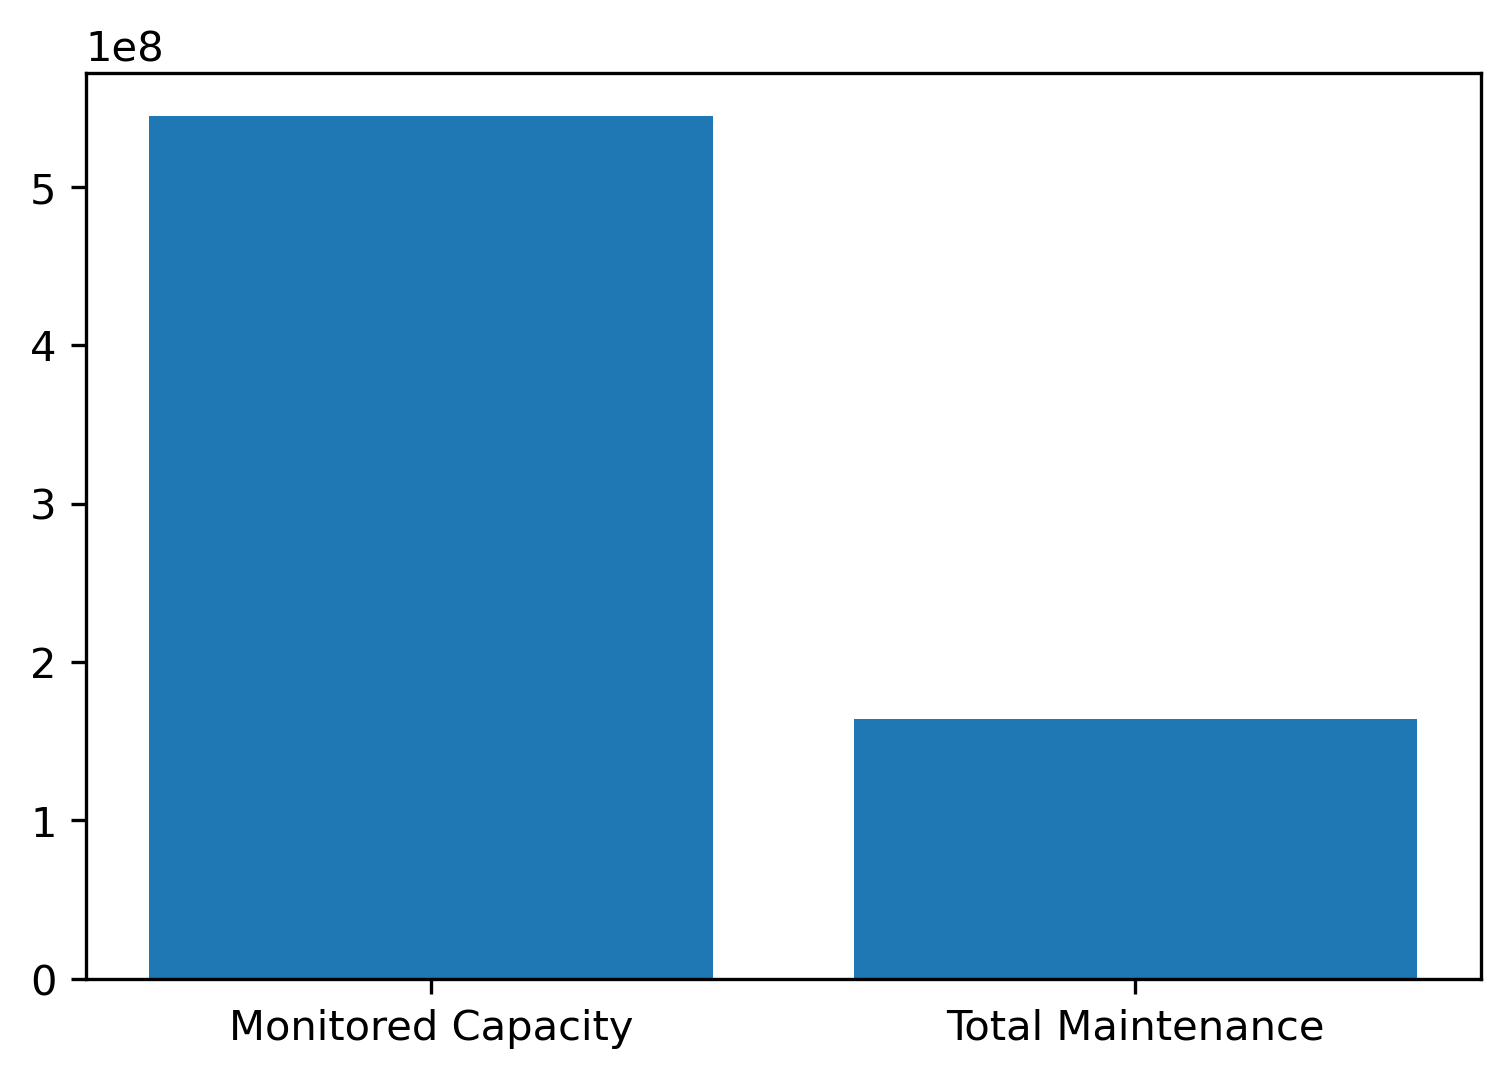

In [14]:
plt.bar(x,y)

In [15]:
monitored = raw_data['monitored_capacity_mw'].sum()
tot_maintenance = raw_data['total_capacity_under_maintenance_mw'].sum()

tot_maintenance/(monitored+tot_maintenance)*100

23.121968008705323

Effectively 23% of the plants are under maintanence, only 77% of the plants are running.

##### Let's explore the types of maintenance

In [16]:
x = ['total', 'planned', 'forced', 'other']
y = [raw_data['total_capacity_under_maintenance_mw'].sum(), raw_data['planned_maintenance_mw'].sum(),
    raw_data['forced_maintenance_mw'].sum(), raw_data['other_reasons_mw'].sum()]

Text(0, 0.5, 'Power (MW)')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


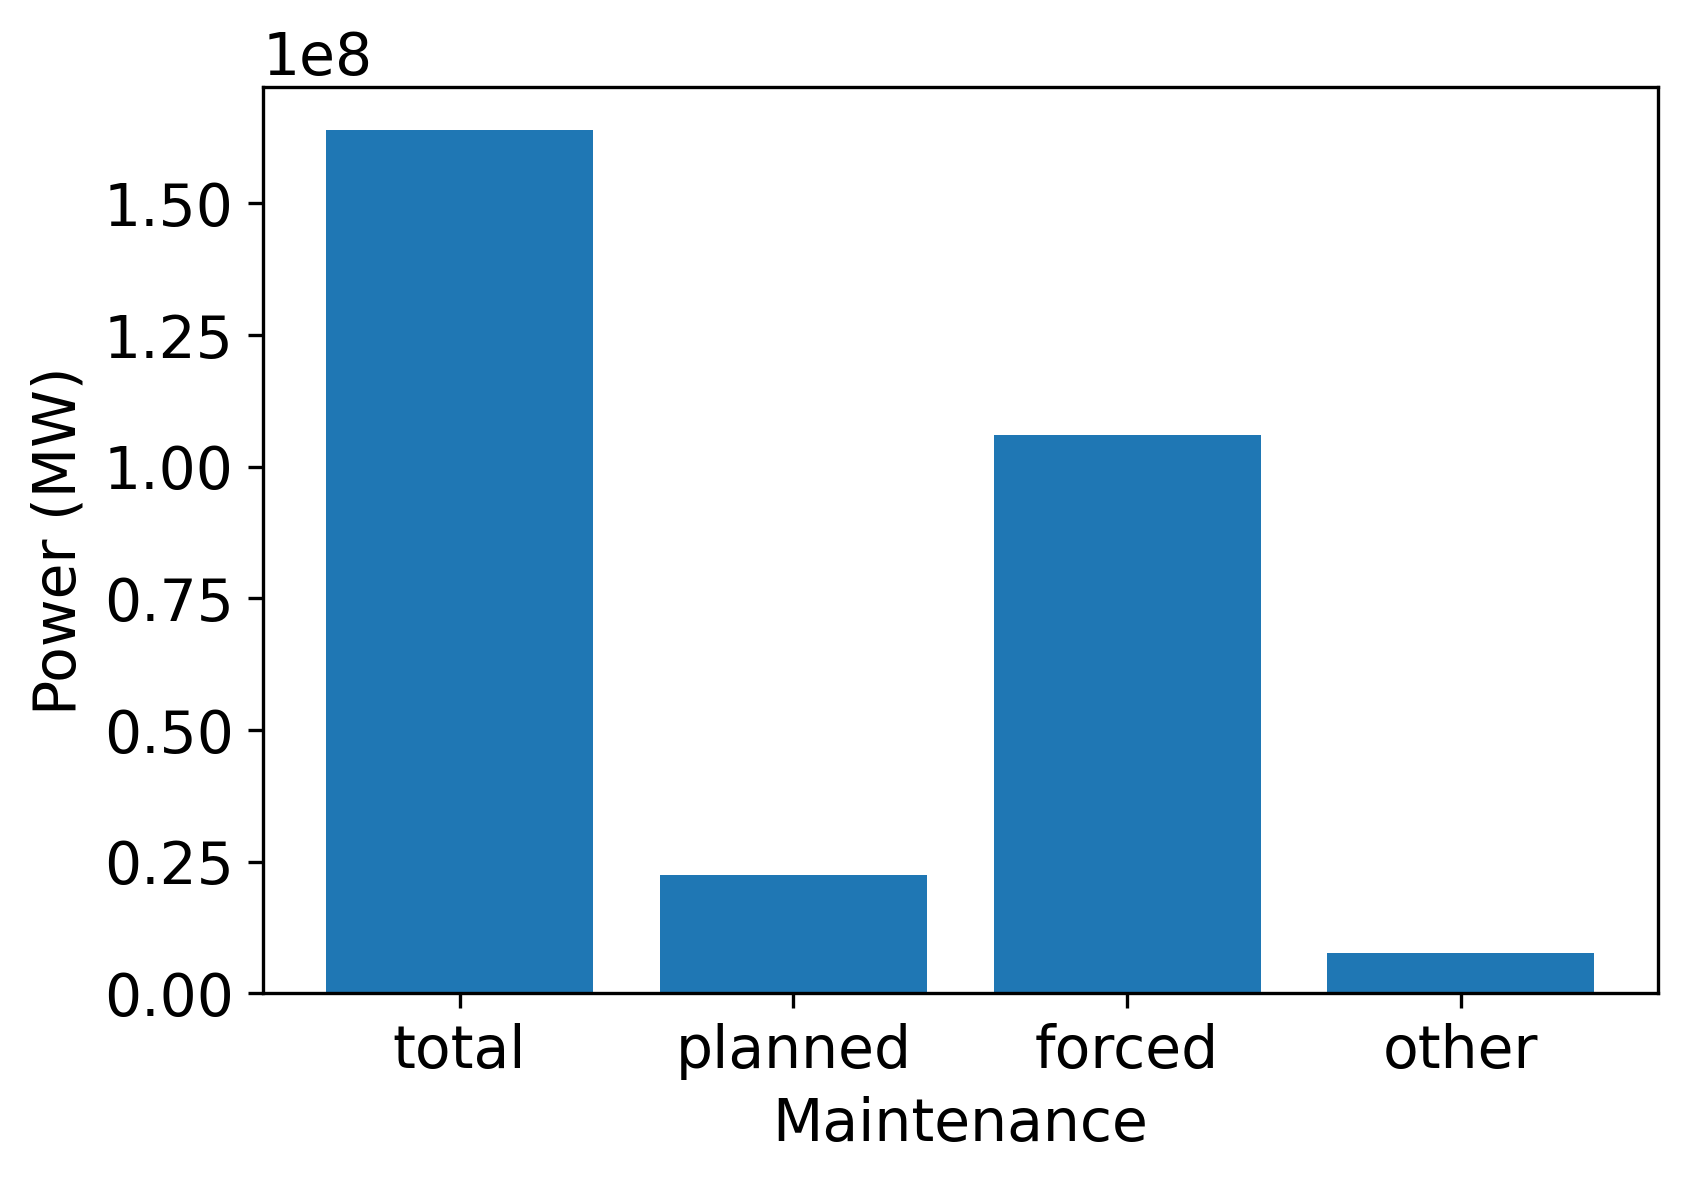

In [17]:
font = {'family':'Arial', 'size':14}
plt.rc('font', **font)

plt.bar(x,y)
plt.xlabel('Maintenance')
plt.ylabel('Power (MW)')

In [18]:
planned   = raw_data['planned_maintenance_mw'].sum()
unplanned = raw_data['forced_maintenance_mw'].sum() + raw_data['other_reasons_mw'].sum()

unplanned/(planned+unplanned)*100

83.46528673100407

- ~84% of the operations are unplanned and only 16% are planned.
- There is a plenty of room here to improve. How can we cut down the unplanned maintenance?

([<matplotlib.patches.Wedge at 0x7f3eb7983d00>,
 [Text(0.954899723972648, 0.5460462591731226, 'Planned'),
  Text(-1.035510598229579, -0.3711034908946823, 'Forced'),
  Text(1.0831350084218268, -0.1918816133219898, 'Other')],
 [Text(0.5208543948941715, 0.29784341409443044, '16.53%'),
  Text(-0.5648239626706794, -0.20242008594255395, '77.88%'),
  Text(0.5908009136846327, -0.10466269817563079, '5.58%')])

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


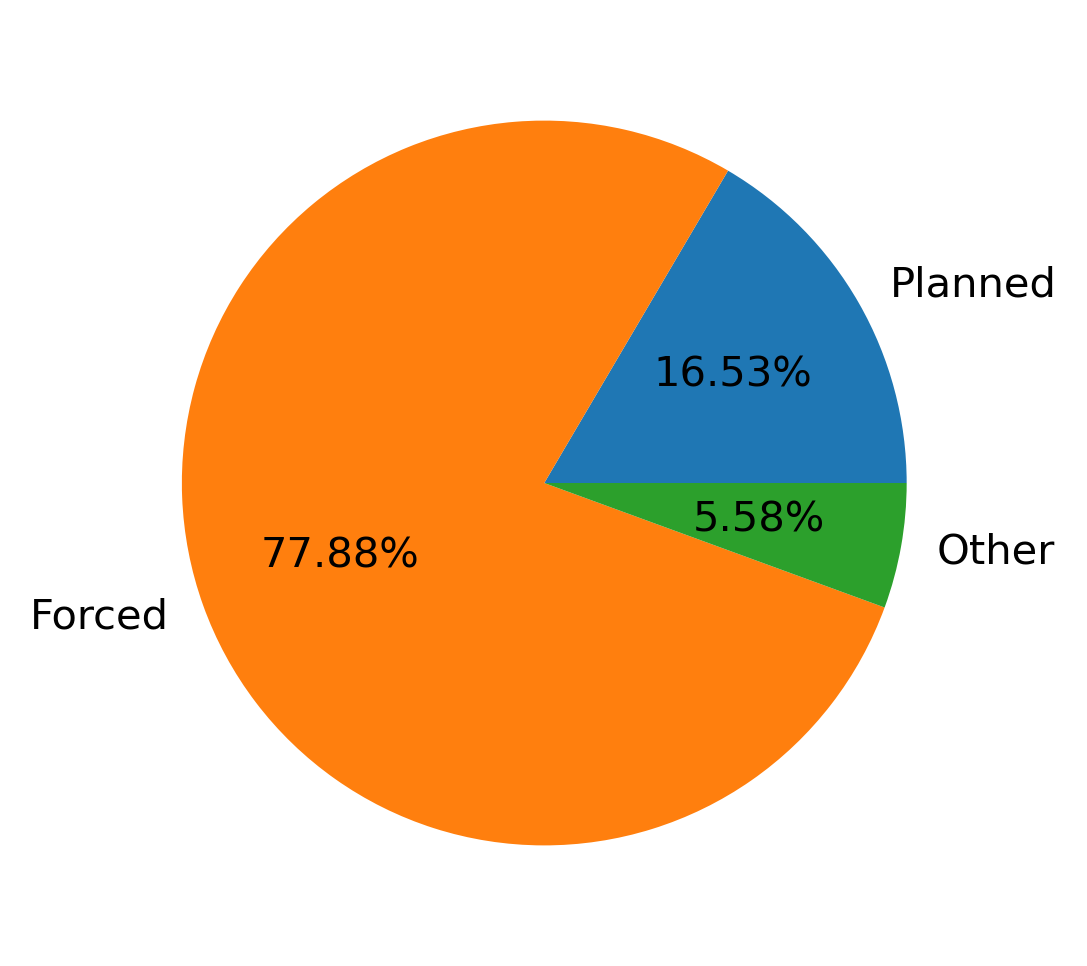

In [19]:
x_main =['Planned', 'Forced', 'Other']
y_main = [raw_data['planned_maintenance_mw'].sum(),raw_data['forced_maintenance_mw'].sum(), raw_data['other_reasons_mw'].sum()]
plt.pie(y_main,pctdistance=0.6,labels=x_main,autopct='%2.2f%%',shadow=False,frame=False,textprops={"fontsize":10})

Let's look at how we are doing through the years.

## 1.4 Converting to datetime format and analysis

In [20]:
raw_df = raw_data.copy()

In [28]:
raw_df['date'] = pd.to_datetime(raw_df['date'],format='%d-%m-%Y')

In [29]:
# sort by date
raw_df = raw_df.sort_values(by=['date'])

In [30]:
raw_df

date      power_station  monitored_capacity_mw  \
25     2017-01-09               MPCL                   86.0   
88     2017-01-09           TATA PCL                 1430.0   
1      2017-01-09            Haryana                 2720.0   
3      2017-01-09  Jammu and Kashmir                 1285.0   
4      2017-01-09             Punjab                 3826.3   
...           ...                ...                    ...   
297985 2022-12-22              HBPCL                 1345.0   
298009 2022-12-22               TSPL                 1980.0   
297986 2022-12-22              HSPCL                  100.0   
298007 2022-12-22               THDC                 1400.0   
298008 2022-12-22              TPDDL                  108.0   

        total_capacity_under_maintenance_mw  planned_maintenance_mw  \
25                                     0.00                    0.00   
88                                   500.00                    0.00   
1                                   2470.00                    0.00   
3                                    150.00                    0.00   
4                                   2697.65                   77.65   
...                                     ...                     ...   
297985                                 0.00                    0.00   
298009                                 0.00                    0.00   
297986                                 0.00                    0.00   
298007                               100.00                  100.00   
298008                               108.00                    0.00   

        forced_maintenance_mw  other_reasons_mw  expected_generation_mu  \
25                        0.0                 0                       1   
88                      500.0                 0                      18   
1                      2470.0                 0                      28   
3                         0.0                 0                      14   
4                      2620.0                 0                      39   
...                       ...               ...                     ...   
297985                    0.0                 0                       0   
298009                    0.0                 0                       0   
297986                    0.0                 0                       0   
298007                    0.0                 0                       0   
298008                    0.0               108                       0   

        actual_generation_mu  
25                         2  
88                        16  
1                          7  
3                         23  
4                         17  
...                      ...  
297985                     5  
298009                    38  
297986                     0  
298007                    13  
298008                     0  

[345273 rows x 9 columns]

In [31]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 345273 entries, 25 to 298008
Data columns (total 9 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   date                                 345273 non-null  datetime64[ns]
 1   power_station                        345273 non-null  object        
 2   monitored_capacity_mw                345273 non-null  float64       
 3   total_capacity_under_maintenance_mw  345273 non-null  float64       
 4   planned_maintenance_mw               345273 non-null  float64       
 5   forced_maintenance_mw                345273 non-null  float64       
 6   other_reasons_mw                     345273 non-null  int64         
 7   expected_generation_mu               345273 non-null  int64         
 8   actual_generation_mu                 345273 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 26.3+ M

#### Let's analyse the data yearwise.

In [32]:
# Year becomes the index column
raw_df_yr = raw_df.groupby(raw_df.date.dt.year)[list(raw_df.select_dtypes(include=[np.number]))].sum()

In [33]:
raw_df_yr

monitored_capacity_mw  total_capacity_under_maintenance_mw  \
date                                                               
2017           3.249604e+07                           9244132.56   
2018           9.992753e+07                          28598882.53   
2019           1.016979e+08                          31386724.16   
2020           1.037090e+08                          34581814.26   
2021           1.047382e+08                          31961247.78   
2022           1.021805e+08                          28066873.55   

      planned_maintenance_mw  forced_maintenance_mw  other_reasons_mw  \
date                                                                    
2017              1252921.25             6736864.17                 0   
2018              4059326.40            20045477.64                 0   
2019              4288690.98            20610017.29                 0   
2020              3654308.13            23973465.39                 0   
2021              5088569.47            19497435.99            247132   
2022              4172607.21            15196844.25           7353019   

      expected_generation_mu  actual_generation_mu  
date                                                
2017                  383670                376920  
2018                 1221378               1218359  
2019                 1291731               1218228  
2020                 1279094               1218465  
2021                 1319270               1281677  
2022                  219688               1331550

Text(0, 0.5, 'Monitored capacity (MW)')

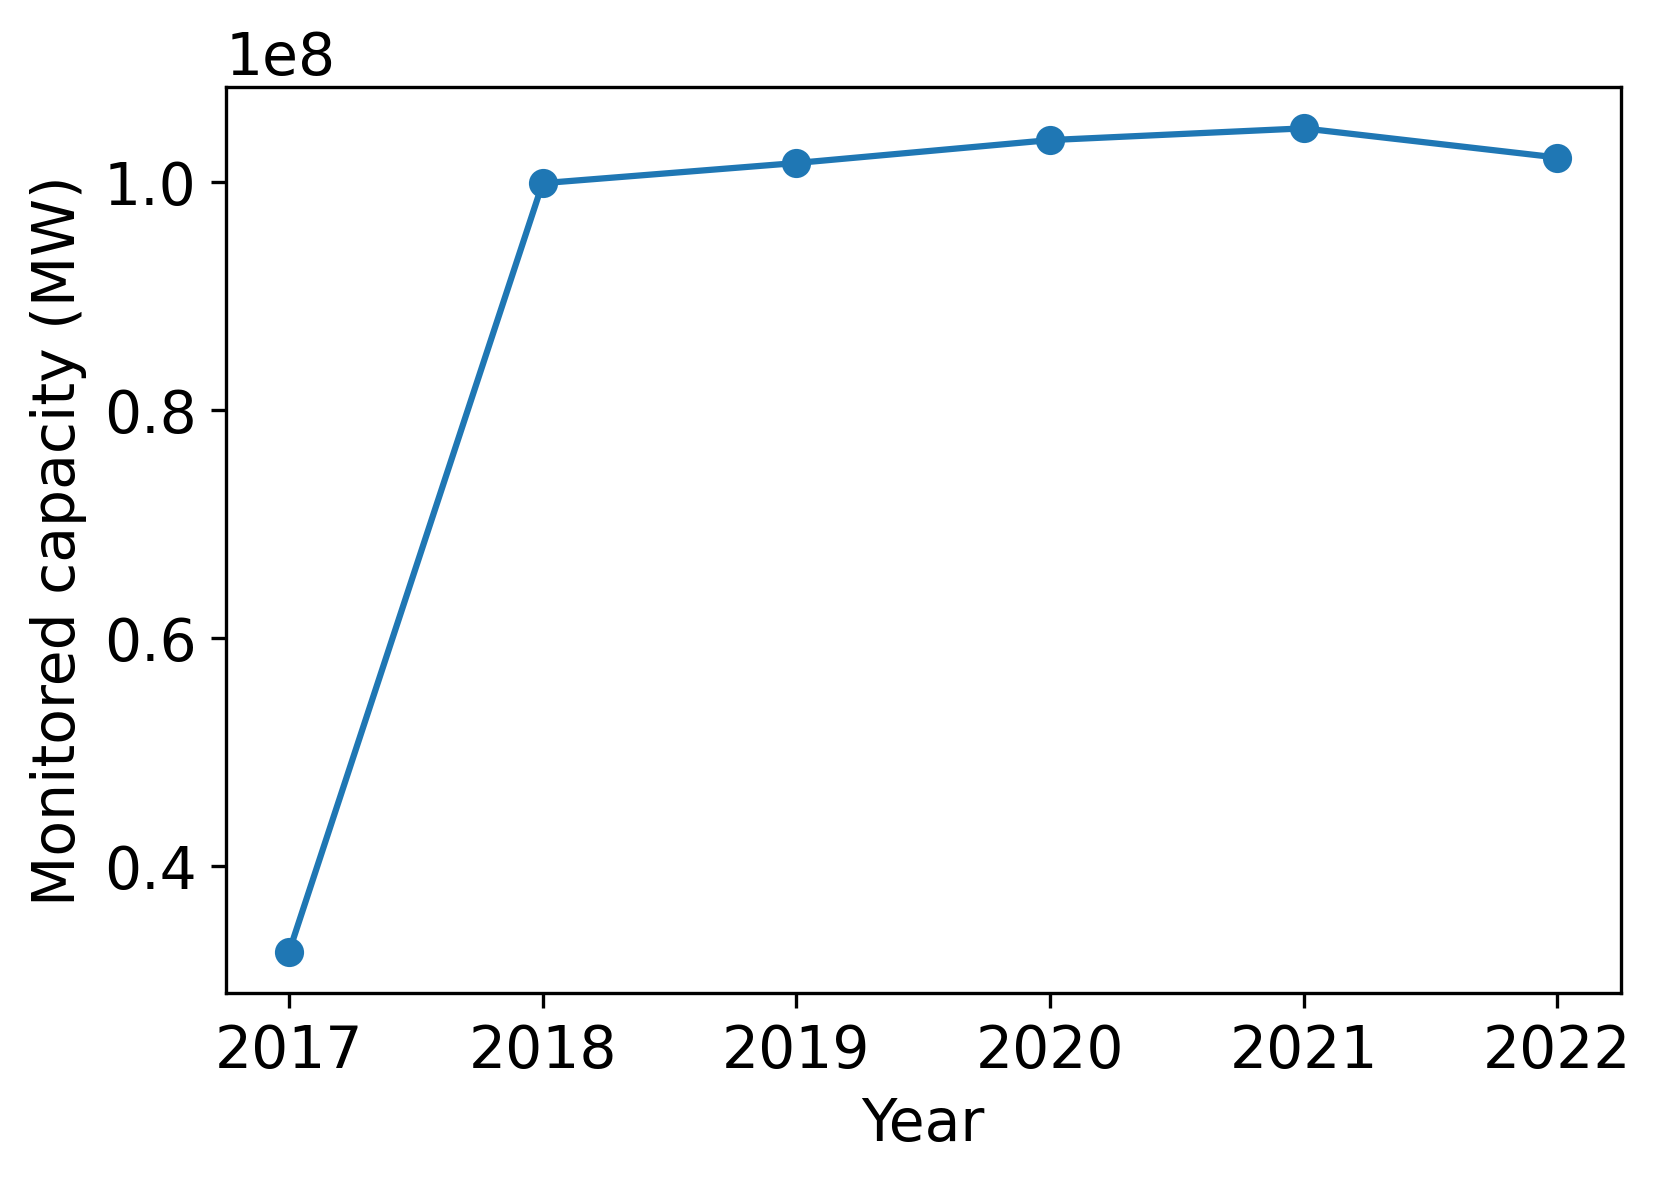

In [34]:
plt.plot(raw_df_yr['monitored_capacity_mw'], '-o')
plt.xlabel('Year'); 
plt.ylabel('Monitored capacity (MW)')

### Power generated, actual vs expected

Text(0, 0.5, 'Power (Million Units)')

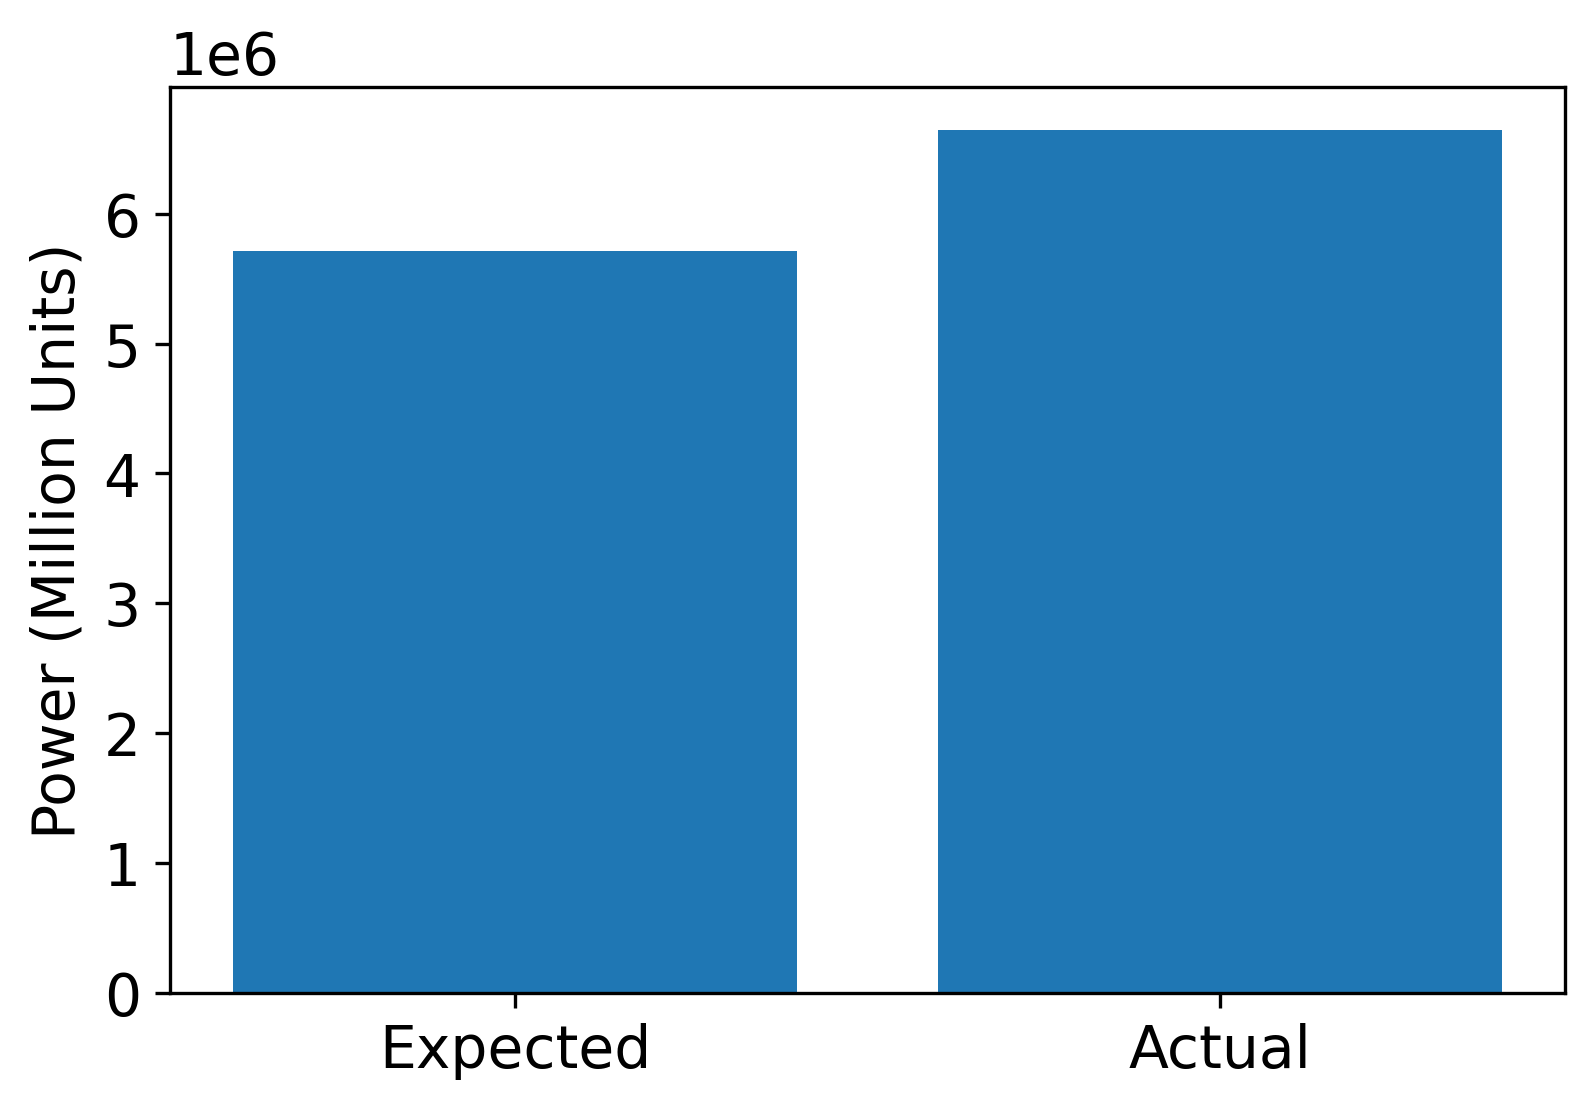

In [35]:
x=['Expected', 'Actual']
y=[raw_df_yr['expected_generation_mu'].sum(), raw_df_yr['actual_generation_mu'].sum()]
plt.bar(x,y)
plt.ylabel("Power (Million Units)")
# plt.xlabel("Power generated (Million Units)")

**More power was generated than expected during 2017 to 2022**

Text(0, 0.5, 'Power Generation (MU)')

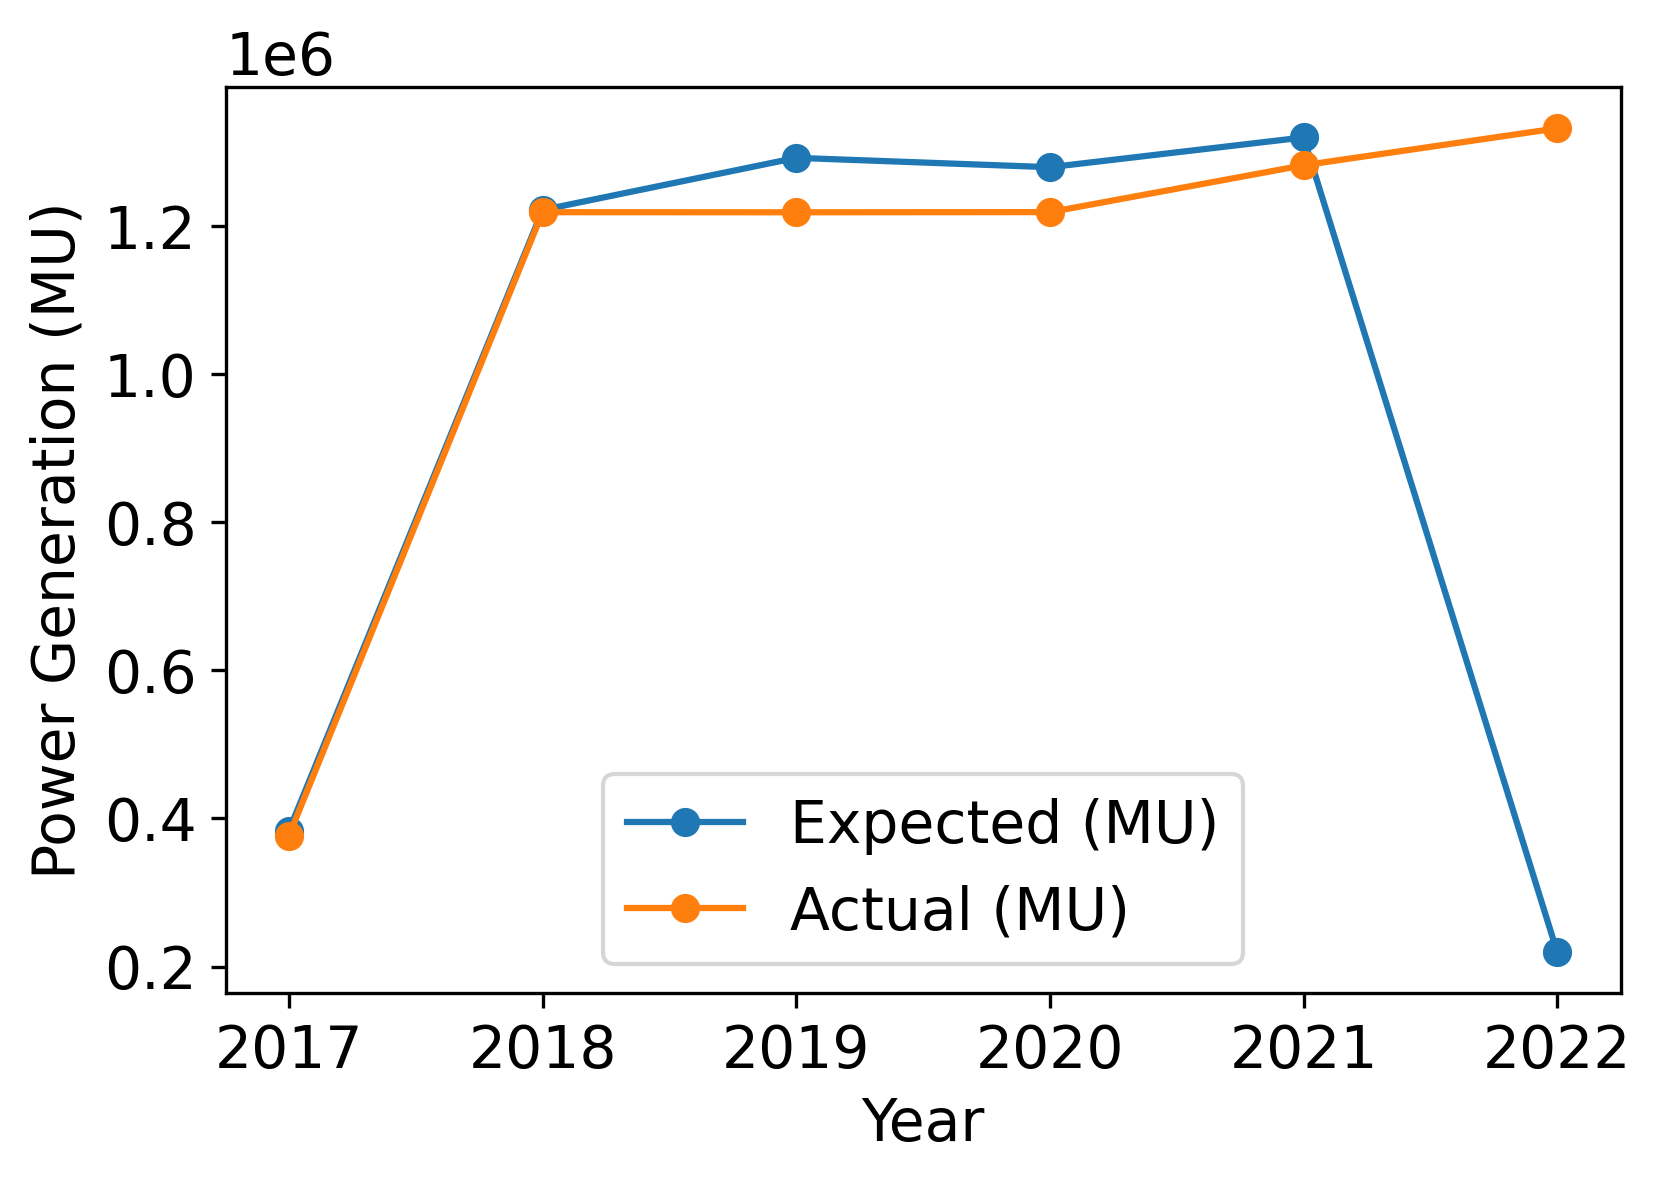

In [36]:
# Year wise expected and actual power generation (Million Units)
plt.plot(raw_df_yr['expected_generation_mu'], '-o', label='Expected (MU)')
plt.plot(raw_df_yr['actual_generation_mu'], '-o', label='Actual (MU)')
plt.legend()
plt.xlabel('Year'); plt.ylabel('Power Generation (MU)')

**Something seems off about 2017 and 2022 numbers, so we'll just ignore them.**

# 2. Data preparation

- Year 2017 and 2022 has incomplete data. Few days are missing.
- **So we have to ignore 2017 and 2022 data**.
<hr>

**To do:**
1. Delete the rows containing 2017 and 2022 data.
2. Generate `unplanned_maintenance_mw` column. <br>
- Sum up `forced_maintenance_mw` and `other_reasons_mw` to `unplanned_maintenance_mw`<br>
- Delete `forced_maintenance_mw` and `other_reasons_mw` columns.
3. Generate `deviation_generation_mu` column
- Take the difference between `actual_generation_mu` and `expected_generation_mu`

## 2.1. Deleting 2017 and 2022 data

In [37]:
raw_df_rem_date = raw_df.copy()

In [38]:
raw_df_rem_date

date      power_station  monitored_capacity_mw  \
25     2017-01-09               MPCL                   86.0   
88     2017-01-09           TATA PCL                 1430.0   
1      2017-01-09            Haryana                 2720.0   
3      2017-01-09  Jammu and Kashmir                 1285.0   
4      2017-01-09             Punjab                 3826.3   
...           ...                ...                    ...   
297985 2022-12-22              HBPCL                 1345.0   
298009 2022-12-22               TSPL                 1980.0   
297986 2022-12-22              HSPCL                  100.0   
298007 2022-12-22               THDC                 1400.0   
298008 2022-12-22              TPDDL                  108.0   

        total_capacity_under_maintenance_mw  planned_maintenance_mw  \
25                                     0.00                    0.00   
88                                   500.00                    0.00   
1                                   2470.00                    0.00   
3                                    150.00                    0.00   
4                                   2697.65                   77.65   
...                                     ...                     ...   
297985                                 0.00                    0.00   
298009                                 0.00                    0.00   
297986                                 0.00                    0.00   
298007                               100.00                  100.00   
298008                               108.00                    0.00   

        forced_maintenance_mw  other_reasons_mw  expected_generation_mu  \
25                        0.0                 0                       1   
88                      500.0                 0                      18   
1                      2470.0                 0                      28   
3                         0.0                 0                      14   
4                      2620.0                 0                      39   
...                       ...               ...                     ...   
297985                    0.0                 0                       0   
298009                    0.0                 0                       0   
297986                    0.0                 0                       0   
298007                    0.0                 0                       0   
298008                    0.0               108                       0   

        actual_generation_mu  
25                         2  
88                        16  
1                          7  
3                         23  
4                         17  
...                      ...  
297985                     5  
298009                    38  
297986                     0  
298007                    13  
298008                     0  

[345273 rows x 9 columns]

In [39]:
# Taking data after 31st Dec 2017 and before 1st Jan 2022, to avoid 2017 and 2022
raw_df_rem_date = raw_df[(raw_df['date'] > '2017-12-31') & (raw_df['date'] < '2022-01-01')]

In [40]:
raw_df_rem_date  

date              power_station  monitored_capacity_mw  \
22986  2018-01-01                  TATA MAH.                 447.00   
23031  2018-01-01                  ST-CMSECP                 250.00   
23072  2018-01-01                  NTPC Ltd.                 500.00   
23073  2018-01-01                       ONGC                 726.60   
23055  2018-01-01                      JITPL                1200.00   
...           ...                        ...                    ...   
280714 2021-12-31  Andaman & Nicobar Islands                  40.05   
280577 2021-12-31                  Rajasthan                8844.80   
280630 2021-12-31                      DBPCL                1200.00   
280717 2021-12-31                     Sikkim                1200.00   
280689 2021-12-31                    GVKP&IL                 220.00   

        total_capacity_under_maintenance_mw  planned_maintenance_mw  \
22986                                   0.0                     0.0   
23031                                 250.0                     0.0   
23072                                   0.0                     0.0   
23073                                   0.0                     0.0   
23055                                 600.0                     0.0   
...                                     ...                     ...   
280714                                  0.0                     0.0   
280577                               2132.0                   250.0   
280630                                  0.0                     0.0   
280717                                  0.0                     0.0   
280689                                220.0                     0.0   

        forced_maintenance_mw  other_reasons_mw  expected_generation_mu  \
22986                     0.0                 0                       4   
23031                   250.0                 0                       4   
23072                     0.0                 0                       7   
23073                     0.0                 0                      12   
23055                   600.0                 0                      18   
...                       ...               ...                     ...   
280714                    0.0                 0                       0   
280577                  632.0                 0                     118   
280630                    0.0                 0                      21   
280717                    0.0                 0                       7   
280689                    0.0                 0                       0   

        actual_generation_mu  
22986                      3  
23031                      0  
23072                      8  
23073                     13  
23055                      0  
...                      ...  
280714                     0  
280577                   114  
280630                    26  
280717                     7  
280689                     0  

[259988 rows x 9 columns]

## 2.2 Generating  `unplanned_maintenance_mw`

In [41]:
df = raw_df_rem_date.copy()

In [42]:
df

date              power_station  monitored_capacity_mw  \
22986  2018-01-01                  TATA MAH.                 447.00   
23031  2018-01-01                  ST-CMSECP                 250.00   
23072  2018-01-01                  NTPC Ltd.                 500.00   
23073  2018-01-01                       ONGC                 726.60   
23055  2018-01-01                      JITPL                1200.00   
...           ...                        ...                    ...   
280714 2021-12-31  Andaman & Nicobar Islands                  40.05   
280577 2021-12-31                  Rajasthan                8844.80   
280630 2021-12-31                      DBPCL                1200.00   
280717 2021-12-31                     Sikkim                1200.00   
280689 2021-12-31                    GVKP&IL                 220.00   

        total_capacity_under_maintenance_mw  planned_maintenance_mw  \
22986                                   0.0                     0.0   
23031                                 250.0                     0.0   
23072                                   0.0                     0.0   
23073                                   0.0                     0.0   
23055                                 600.0                     0.0   
...                                     ...                     ...   
280714                                  0.0                     0.0   
280577                               2132.0                   250.0   
280630                                  0.0                     0.0   
280717                                  0.0                     0.0   
280689                                220.0                     0.0   

        forced_maintenance_mw  other_reasons_mw  expected_generation_mu  \
22986                     0.0                 0                       4   
23031                   250.0                 0                       4   
23072                     0.0                 0                       7   
23073                     0.0                 0                      12   
23055                   600.0                 0                      18   
...                       ...               ...                     ...   
280714                    0.0                 0                       0   
280577                  632.0                 0                     118   
280630                    0.0                 0                      21   
280717                    0.0                 0                       7   
280689                    0.0                 0                       0   

        actual_generation_mu  
22986                      3  
23031                      0  
23072                      8  
23073                     13  
23055                      0  
...                      ...  
280714                     0  
280577                   114  
280630                    26  
280717                     7  
280689                     0  

[259988 rows x 9 columns]

In [43]:
# Sum up forced_maintenance_mw and other_reasons_mw to unplanned_maintenance_mw
df['unplanned_maintenance_mw'] = (df['forced_maintenance_mw']+ df['other_reasons_mw'])

In [44]:
df.head()

date power_station  monitored_capacity_mw  \
22986 2018-01-01     TATA MAH.                  447.0   
23031 2018-01-01     ST-CMSECP                  250.0   
23072 2018-01-01     NTPC Ltd.                  500.0   
23073 2018-01-01          ONGC                  726.6   
23055 2018-01-01         JITPL                 1200.0   

       total_capacity_under_maintenance_mw  planned_maintenance_mw  \
22986                                  0.0                     0.0   
23031                                250.0                     0.0   
23072                                  0.0                     0.0   
23073                                  0.0                     0.0   
23055                                600.0                     0.0   

       forced_maintenance_mw  other_reasons_mw  expected_generation_mu  \
22986                    0.0                 0                       4   
23031                  250.0                 0                       4   
23072                    0.0                 0                       7   
23073                    0.0                 0                      12   
23055                  600.0                 0                      18   

       actual_generation_mu  unplanned_maintenance_mw  
22986                     3                       0.0  
23031                     0                     250.0  
23072                     8                       0.0  
23073                    13                       0.0  
23055                     0                     600.0

In [45]:
# Delete forced_maintenance_mw and other_reasons_mw (axis=0 is for rows, axis=1 is for columns)
df = df.drop(['forced_maintenance_mw','other_reasons_mw'], axis=1)

In [46]:
df

date              power_station  monitored_capacity_mw  \
22986  2018-01-01                  TATA MAH.                 447.00   
23031  2018-01-01                  ST-CMSECP                 250.00   
23072  2018-01-01                  NTPC Ltd.                 500.00   
23073  2018-01-01                       ONGC                 726.60   
23055  2018-01-01                      JITPL                1200.00   
...           ...                        ...                    ...   
280714 2021-12-31  Andaman & Nicobar Islands                  40.05   
280577 2021-12-31                  Rajasthan                8844.80   
280630 2021-12-31                      DBPCL                1200.00   
280717 2021-12-31                     Sikkim                1200.00   
280689 2021-12-31                    GVKP&IL                 220.00   

        total_capacity_under_maintenance_mw  planned_maintenance_mw  \
22986                                   0.0                     0.0   
23031                                 250.0                     0.0   
23072                                   0.0                     0.0   
23073                                   0.0                     0.0   
23055                                 600.0                     0.0   
...                                     ...                     ...   
280714                                  0.0                     0.0   
280577                               2132.0                   250.0   
280630                                  0.0                     0.0   
280717                                  0.0                     0.0   
280689                                220.0                     0.0   

        expected_generation_mu  actual_generation_mu  unplanned_maintenance_mw  
22986                        4                     3                       0.0  
23031                        4                     0                     250.0  
23072                        7                     8                       0.0  
23073                       12                    13                       0.0  
23055                       18                     0                     600.0  
...                        ...                   ...                       ...  
280714                       0                     0                       0.0  
280577                     118                   114                     632.0  
280630                      21                    26                       0.0  
280717                       7                     7                       0.0  
280689                       0                     0                       0.0  

[259988 rows x 8 columns]

## 2.3. Generating `deviation_generation_mu`

In [47]:
# Generating deviation_mu column by taking the difference between actual_generation_mu and expected_generation_mu
df['deviation_generation_mu'] = df['actual_generation_mu'] - df['expected_generation_mu']

In [48]:
df.head()

date power_station  monitored_capacity_mw  \
22986 2018-01-01     TATA MAH.                  447.0   
23031 2018-01-01     ST-CMSECP                  250.0   
23072 2018-01-01     NTPC Ltd.                  500.0   
23073 2018-01-01          ONGC                  726.6   
23055 2018-01-01         JITPL                 1200.0   

       total_capacity_under_maintenance_mw  planned_maintenance_mw  \
22986                                  0.0                     0.0   
23031                                250.0                     0.0   
23072                                  0.0                     0.0   
23073                                  0.0                     0.0   
23055                                600.0                     0.0   

       expected_generation_mu  actual_generation_mu  unplanned_maintenance_mw  \
22986                       4                     3                       0.0   
23031                       4                     0                     250.0   
23072                       7                     8                       0.0   
23073                      12                    13                       0.0   
23055                      18                     0                     600.0   

       deviation_generation_mu  
22986                       -1  
23031                       -4  
23072                        1  
23073                        1  
23055                      -18

# 3. Data exploration

## 3.1 Top producer

Let's see the total power generation.

Text(0, 0.5, 'Counts')

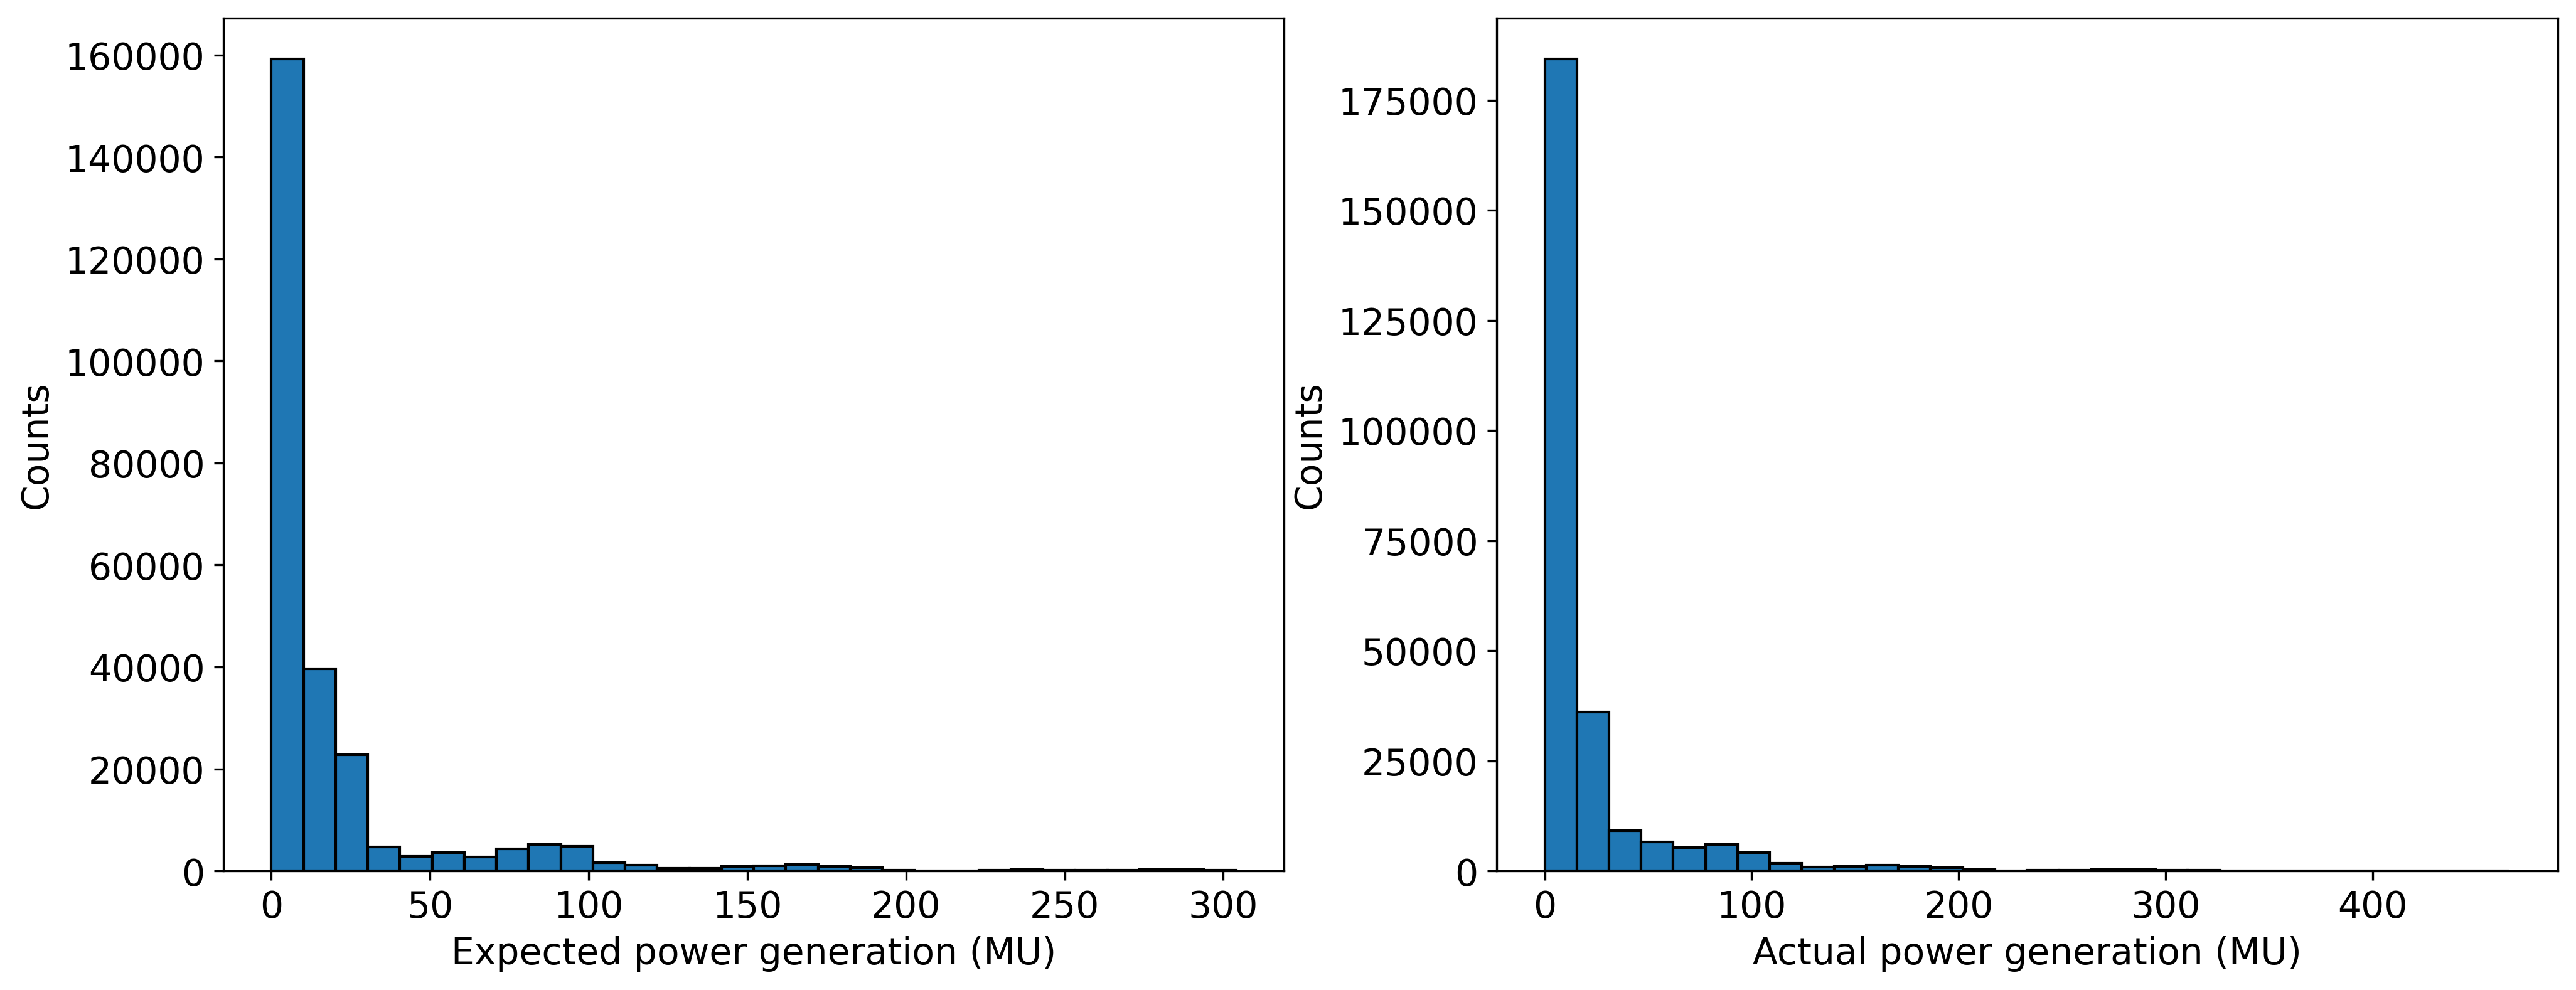

In [49]:
plt.figure(figsize=(16,6))
# plotting with 1 row and 2 columns
plt.subplot(1,2,1)
plt.hist(df['expected_generation_mu'], bins=30, edgecolor='k');
plt.xlabel('Expected power generation (MU)')
plt.ylabel('Counts')

plt.subplot(1,2,2)
plt.hist(df['actual_generation_mu'], bins=30, edgecolor='k');
plt.xlabel('Actual power generation (MU)')
plt.ylabel('Counts')

In [50]:
df_power = df.copy()
df_power = df_power.drop(["date"],axis=1)

In [51]:
df_power = df_power.groupby(by='power_station').sum()
df_power

monitored_capacity_mw  total_capacity_under_maintenance_mw  \
power_station                                                               
0                         3701891.40                           1132135.43   
ABAN POWR                  172631.94                             17610.60   
ACB                        468325.00                            159730.00   
ACPL                            0.00                                 0.00   
ADHPL                      276672.00                             49632.00   
...                              ...                                  ...   
VESPL                       50435.00                             50435.00   
VIP                        864600.00                            703200.00   
VVL                        194535.00                            194535.00   
WPCL                      3361140.00                           1272330.00   
West Bengal               9383896.00                           2785286.50   

               planned_maintenance_mw  expected_generation_mu  \
power_station                                                   
0                            186090.6                   47778   
ABAN POWR                      6539.2                    1426   
ACB                            5865.0                    7095   
ACPL                              0.0                       0   
ADHPL                         28992.0                    1972   
...                               ...                     ...   
VESPL                             0.0                       0   
VIP                           10800.0                    9024   
VVL                               0.0                       0   
WPCL                          51345.0                   36499   
West Bengal                  277877.5                  111300   

               actual_generation_mu  unplanned_maintenance_mw  \
power_station                                                   
0                             45969                 623436.36   
ABAN POWR                      1520                   8316.00   
ACB                            6281                 153115.00   
ACPL                              0                      0.00   
ADHPL                          1880                  18336.00   
...                             ...                       ...   
VESPL                             0                  50435.00   
VIP                            2928                 692400.00   
VVL                               0                 194535.00   
WPCL                          39474                1219185.00   
West Bengal                  112957                2120203.00   

               deviation_generation_mu  
power_station                           
0                                -1809  
ABAN POWR                           94  
ACB                               -814  
ACPL                                 0  
ADHPL                              -92  
...                                ...  
VESPL                                0  
VIP                              -6096  
VVL                                  0  
WPCL                              2975  
West Bengal                       1657  

[182 rows x 7 columns]

In [52]:
df_power = df_power.sort_values(by=['actual_generation_mu'], ascending=False) # in descending order (top producer first)

NTPC comes to top of the list

In [53]:
df_power

monitored_capacity_mw  \
power_station                                      
NTPC Ltd.                            69492888.43   
Maharashtra                          19214748.00   
APL                                  13314840.00   
NPCIL                                 9625880.00   
DVC                                  10313411.20   
...                                          ...   
Andaman & Nicobar Islands               58513.05   
GAUTAMI                                668624.00   
CPL                                         0.00   
NDPL                                    64260.00   
AMNEPL                                 354486.00   

                           total_capacity_under_maintenance_mw  \
power_station                                                    
NTPC Ltd.                                          16258674.19   
Maharashtra                                         5230859.00   
APL                                                 3185160.00   
NPCIL                                               2275160.00   
DVC                                                 2522945.60   
...                                                        ...   
Andaman & Nicobar Islands                                 0.00   
GAUTAMI                                              667232.00   
CPL                                                       0.00   
NDPL                                                  63936.00   
AMNEPL                                               354486.00   

                           planned_maintenance_mw  expected_generation_mu  \
power_station                                                               
NTPC Ltd.                              3154649.02                 1023002   
Maharashtra                             892434.00                  234271   
APL                                     209550.00                  229296   
NPCIL                                  1377520.00                  168715   
DVC                                     295998.00                  145987   
...                                           ...                     ...   
Andaman & Nicobar Islands                    0.00                       0   
GAUTAMI                                      0.00                       0   
CPL                                          0.00                       0   
NDPL                                         0.00                       0   
AMNEPL                                       0.00                       0   

                           actual_generation_mu  unplanned_maintenance_mw  \
power_station                                                               
NTPC Ltd.                               1073898               11439416.55   
Maharashtra                              210833                3768821.00   
APL                                      203587                2617890.00   
NPCIL                                    164261                 894280.00   
DVC                                      153625                1803564.80   
...                                         ...                       ...   
Andaman & Nicobar Islands                     0                      0.00   
GAUTAMI                                       0                   6960.00   
CPL                                           0                      0.00   
NDPL                                          0                      0.00   
AMNEPL                                        0                 354486.00   

                           deviation_generation_mu  
power_station                                       
NTPC Ltd.                                    50896  
Maharashtra                                 -23438  
APL                                         -25709  
NPCIL                                        -4454  
DVC                                           7638  
...                                            ...  
Andaman & Nicobar Islands                        0  
GAUTAMI   

In [54]:
df_power.head(n=20)

monitored_capacity_mw  total_capacity_under_maintenance_mw  \
power_station                                                                
NTPC Ltd.                 69492888.43                          16258674.19   
Maharashtra               19214748.00                           5230859.00   
APL                       13314840.00                           3185160.00   
NPCIL                      9625880.00                           2275160.00   
DVC                       10313411.20                           2522945.60   
Telangana                 10283564.10                           2114987.70   
SPL                        5706360.00                            343200.00   
Rajasthan                 11174572.80                           4283619.10   
Uttar Pradesh              8747588.60                           2561181.40   
West Bengal                9383896.00                           2785286.50   
Tamil Nadu                10253291.08                           3014300.79   
Gujarat                   13623315.02                           5718309.15   
Karnataka                 12744542.40                           5096908.40   
Madhya Pradesh             8465955.00                           2910334.00   
CGPL                       5764000.00                           1423200.00   
NHPC                       7827129.20                           1565691.00   
Andhra Pradesh             7615631.40                           2096908.00   
Chhatisgarh                4708280.00                            806280.00   
NLC                        4815740.00                           1122375.00   
SEIL                       3298680.00                            353100.00   

                planned_maintenance_mw  expected_generation_mu  \
power_station                                                    
NTPC Ltd.                   3154649.02                 1023002   
Maharashtra                  892434.00                  234271   
APL                          209550.00                  229296   
NPCIL                       1377520.00                  168715   
DVC                          295998.00                  145987   
Telangana                    408267.20                  135485   
SPL                          124080.00                  121265   
Rajasthan                    802399.00                  158642   
Uttar Pradesh                887690.40                  135543   
West Bengal                  277877.50                  111300   
Tamil Nadu                   671050.20                  125345   
Gujarat                      452886.00                  116843   
Karnataka                    186109.80                  129839   
Madhya Pradesh               425600.00                  107521   
CGPL                         263200.00                  103461   
NHPC                         830366.20                   92768   
Andhra Pradesh               170600.00                  103523   
Chhatisgarh                  207860.00                   82837   
NLC                          249545.00                   79582   
SEIL                          83820.00                   63632   

                actual_generation_mu  unplanned_maintenance_mw  \
power_station                                                    
NTPC Ltd.                    1073898               11439416.55   
Maharashtra                   210833                3768821.00   
APL                           203587                2617890.00   
NPCIL                         164261                 894280.00   
DVC                           153625                1803564.80   
Telangana                     136689                 784875.00   
SPL                           129898                 210540.00   
Rajasthan                     127850                2541518.60   
Uttar Pradesh                 116622                1649172.00   
West Bengal                   112957                2120203.00   
Tamil Nadu                    112415                17

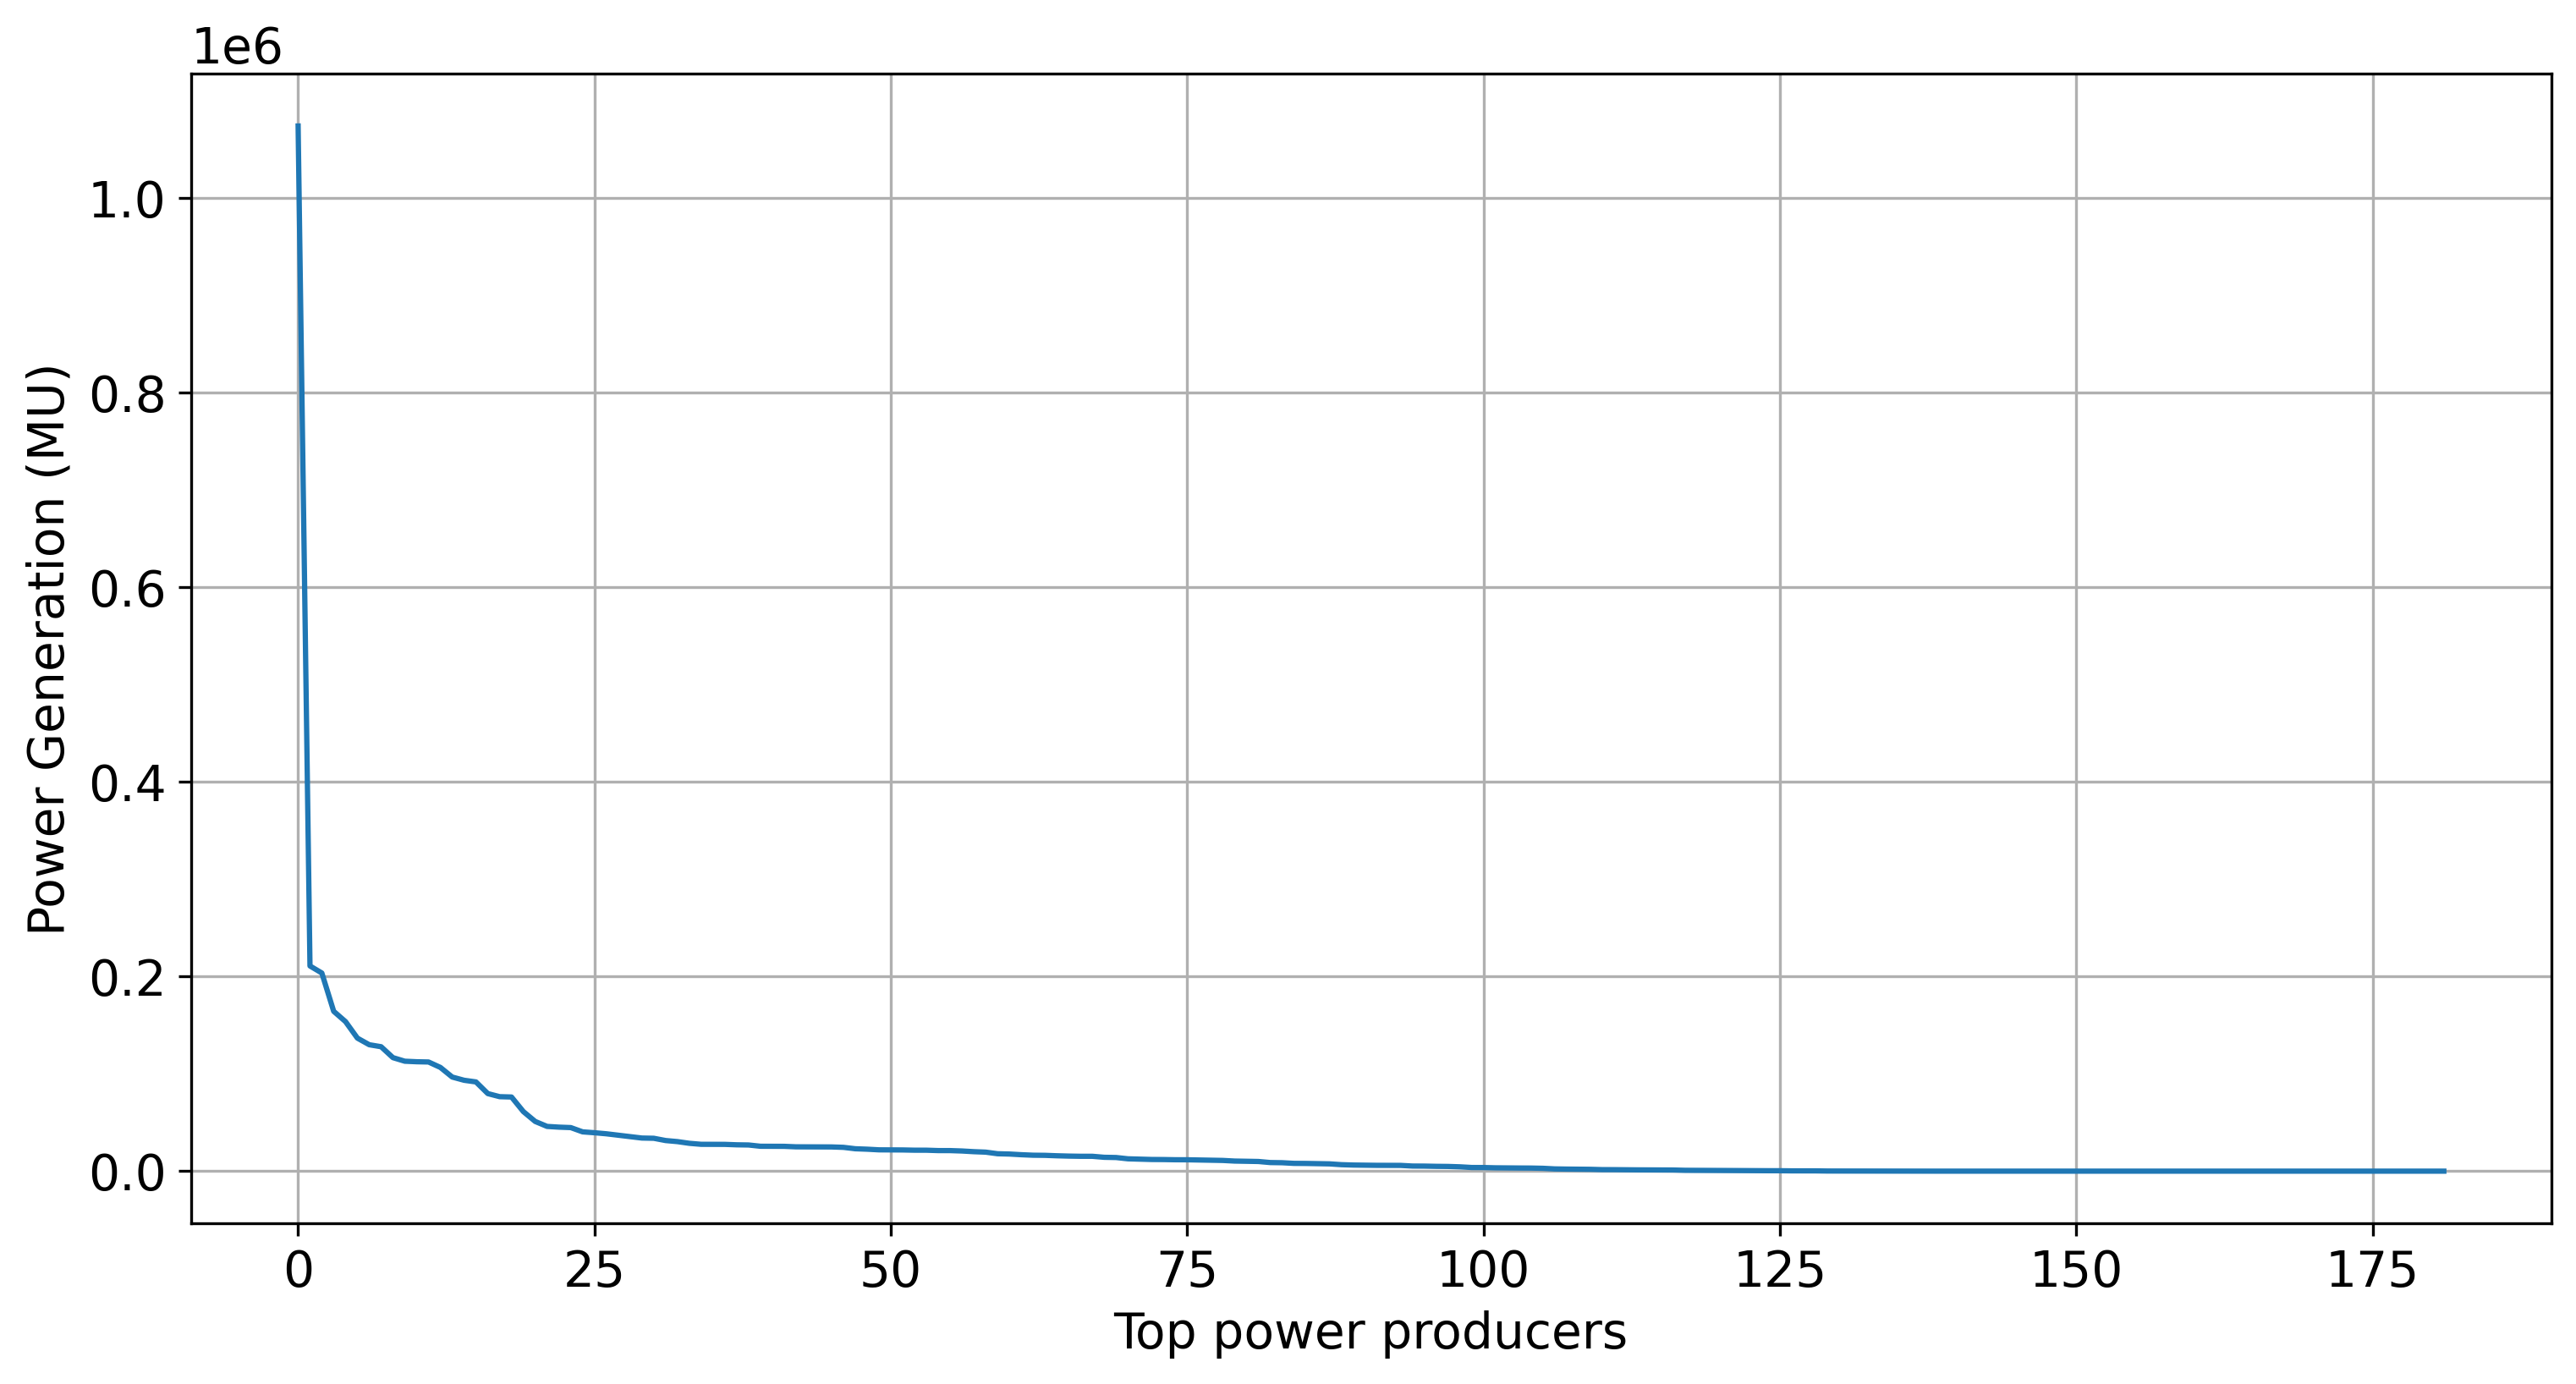

In [55]:
x=np.arange(0,182)
plt.figure(figsize=(12,6))
plt.plot(x, df_power['actual_generation_mu'].to_numpy())
plt.xlabel('Top power producers')
plt.ylabel('Power Generation (MU)')
plt.grid()

Let's do a linear-log plot to see better difference between the top and the least producers.

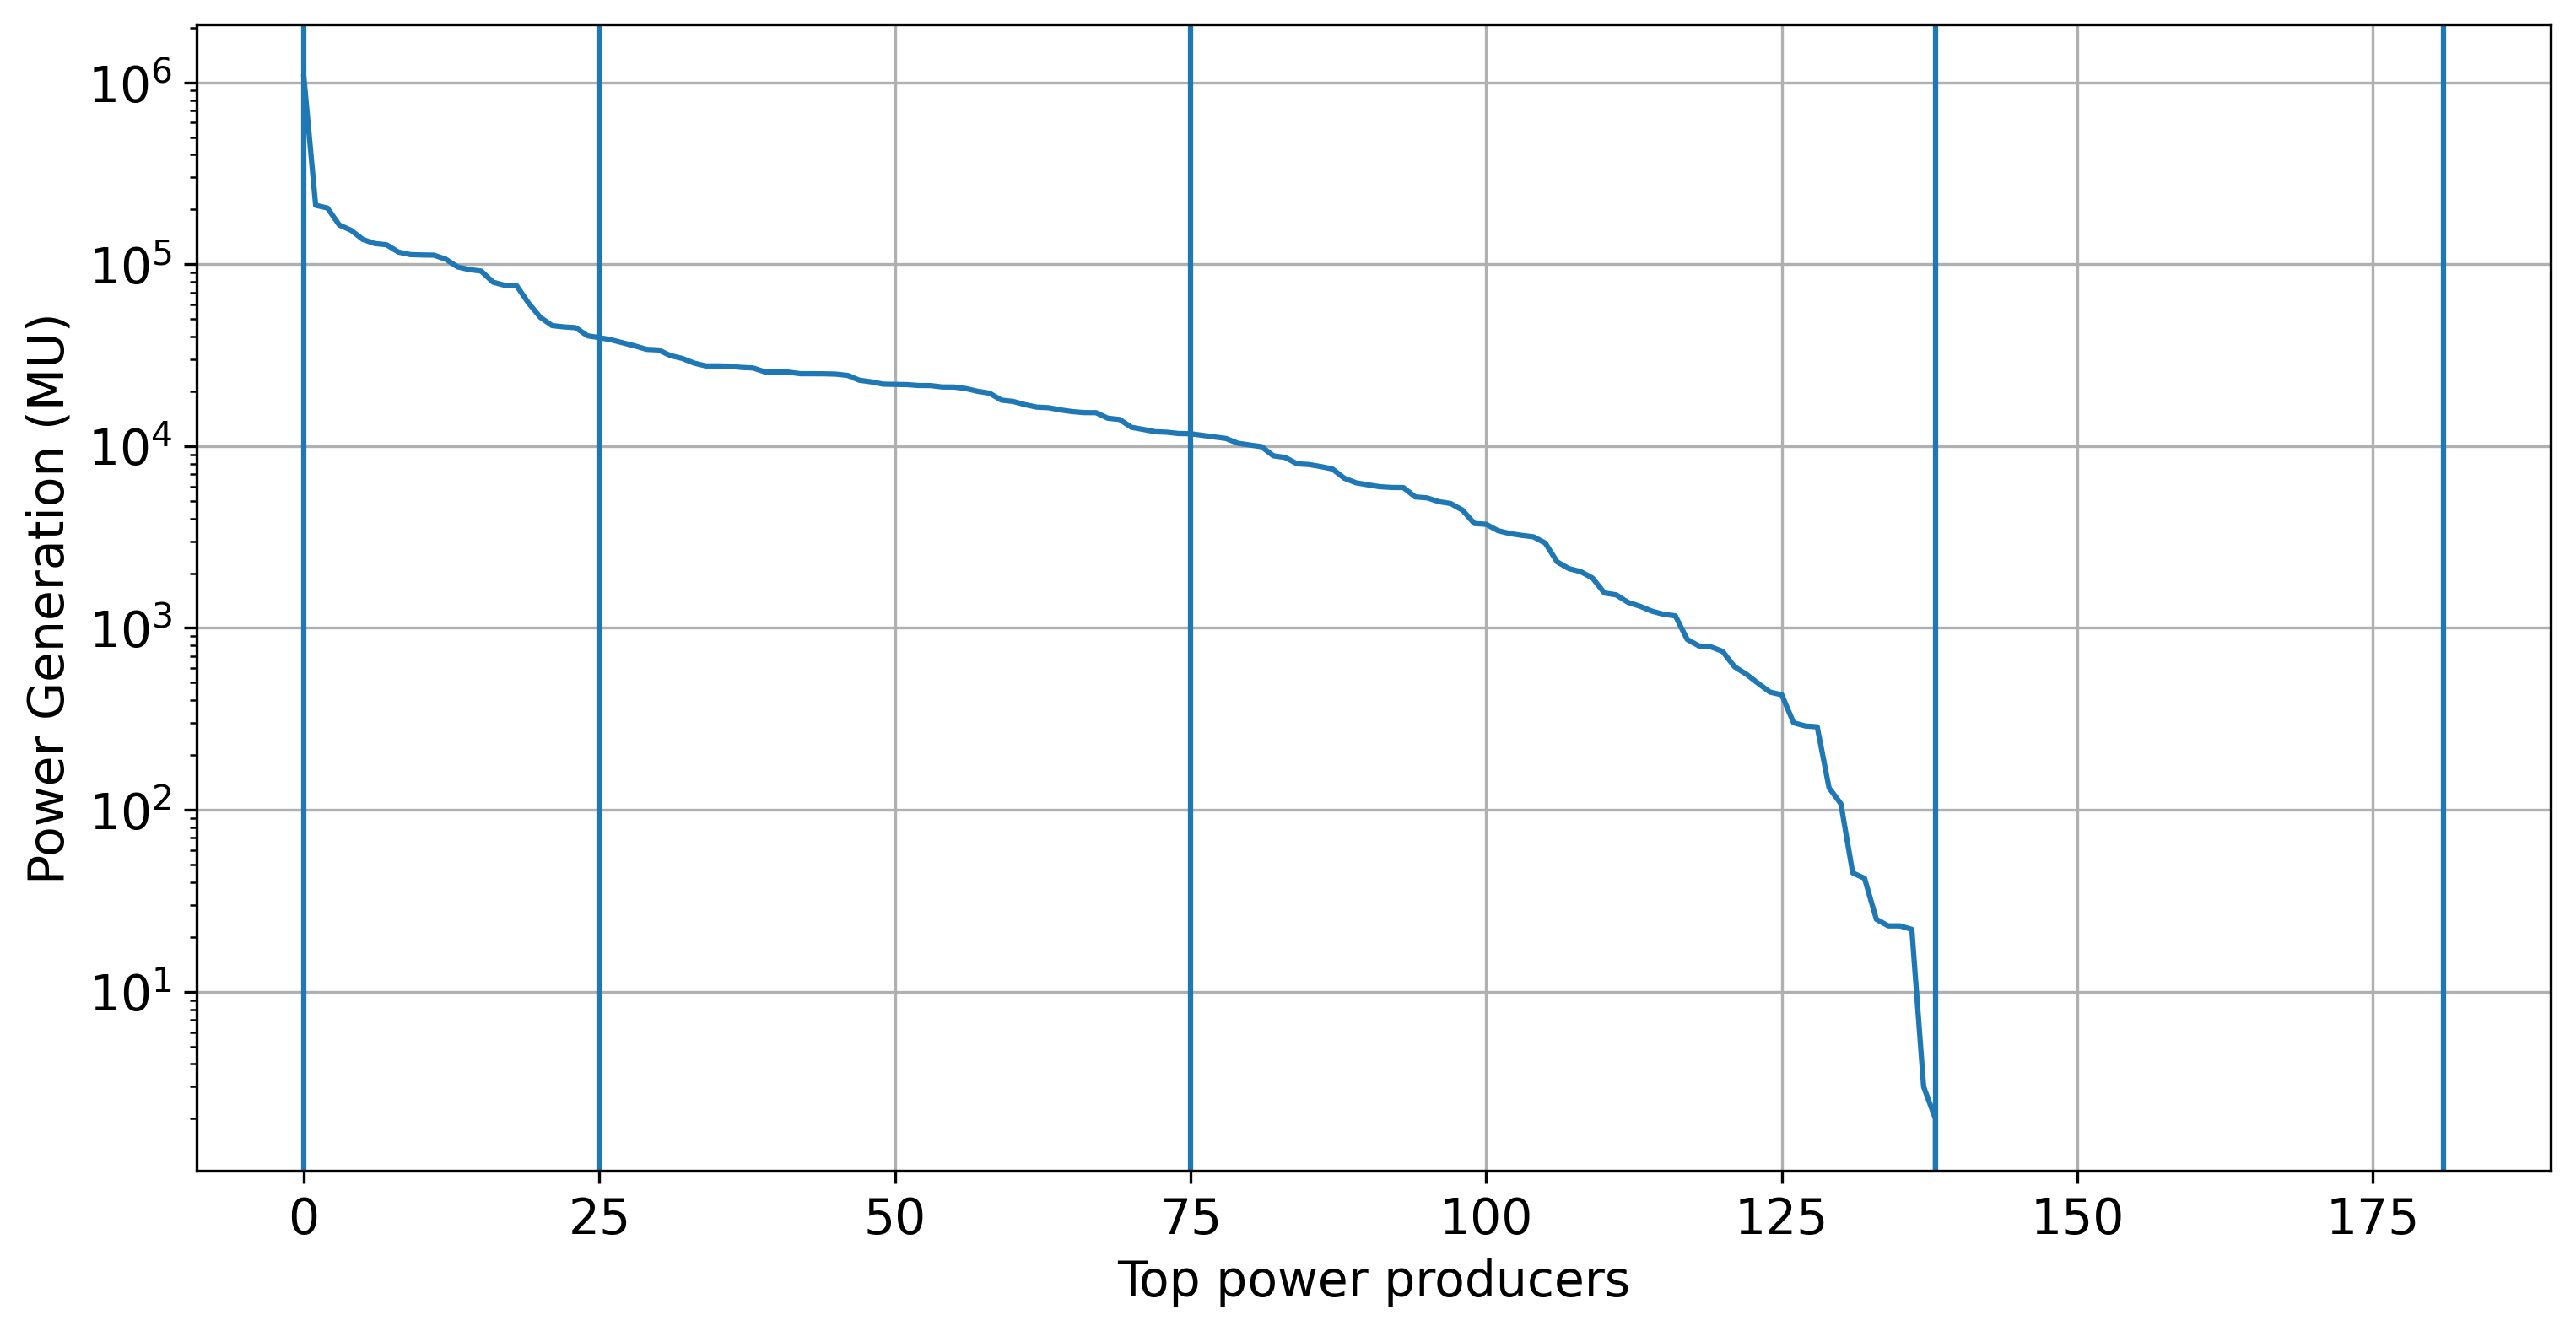

In [56]:
x=np.arange(0,182)
plt.figure(figsize=(12,6))
plt.yscale("log")
plt.plot(x, df_power['actual_generation_mu'].to_numpy())

plt.xlabel('Top power producers')
plt.ylabel('Power Generation (MU)')
plt.grid()

# To do: Uncomment the below line if you want to put different vertical lines.
plt.axvline(x=0); plt.axvline(x=25); plt.axvline(x=75); plt.axvline(x=138);plt.axvline(x=181);

Seems there is a very tight competition in the top 25. <br>
From 25-75 also a tough competition.

Let's see who is the top producer.

## 3.2 Capacity and power generation

In [57]:
x=['Monitored', 'Total Maintenance']
y=[df['monitored_capacity_mw'].sum(), df['total_capacity_under_maintenance_mw'].sum()]

<BarContainer object of 2 artists>

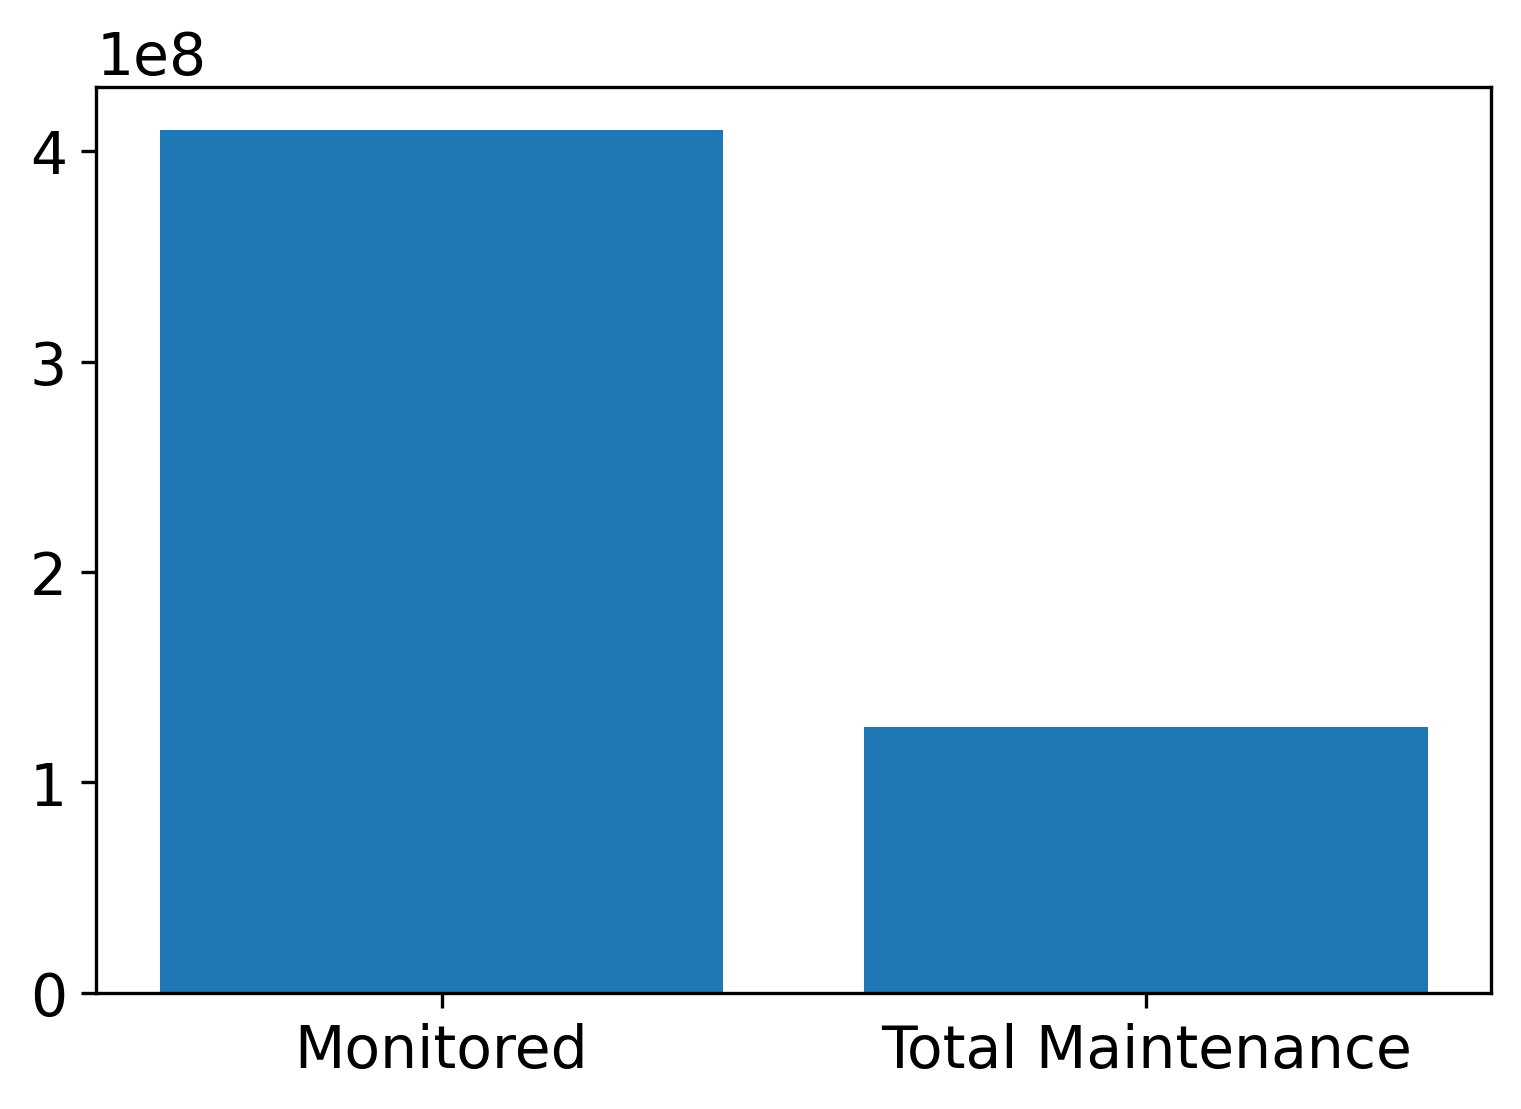

In [58]:
plt.bar(x,y)

Let's calculate the percent of both and put it in a pie chart

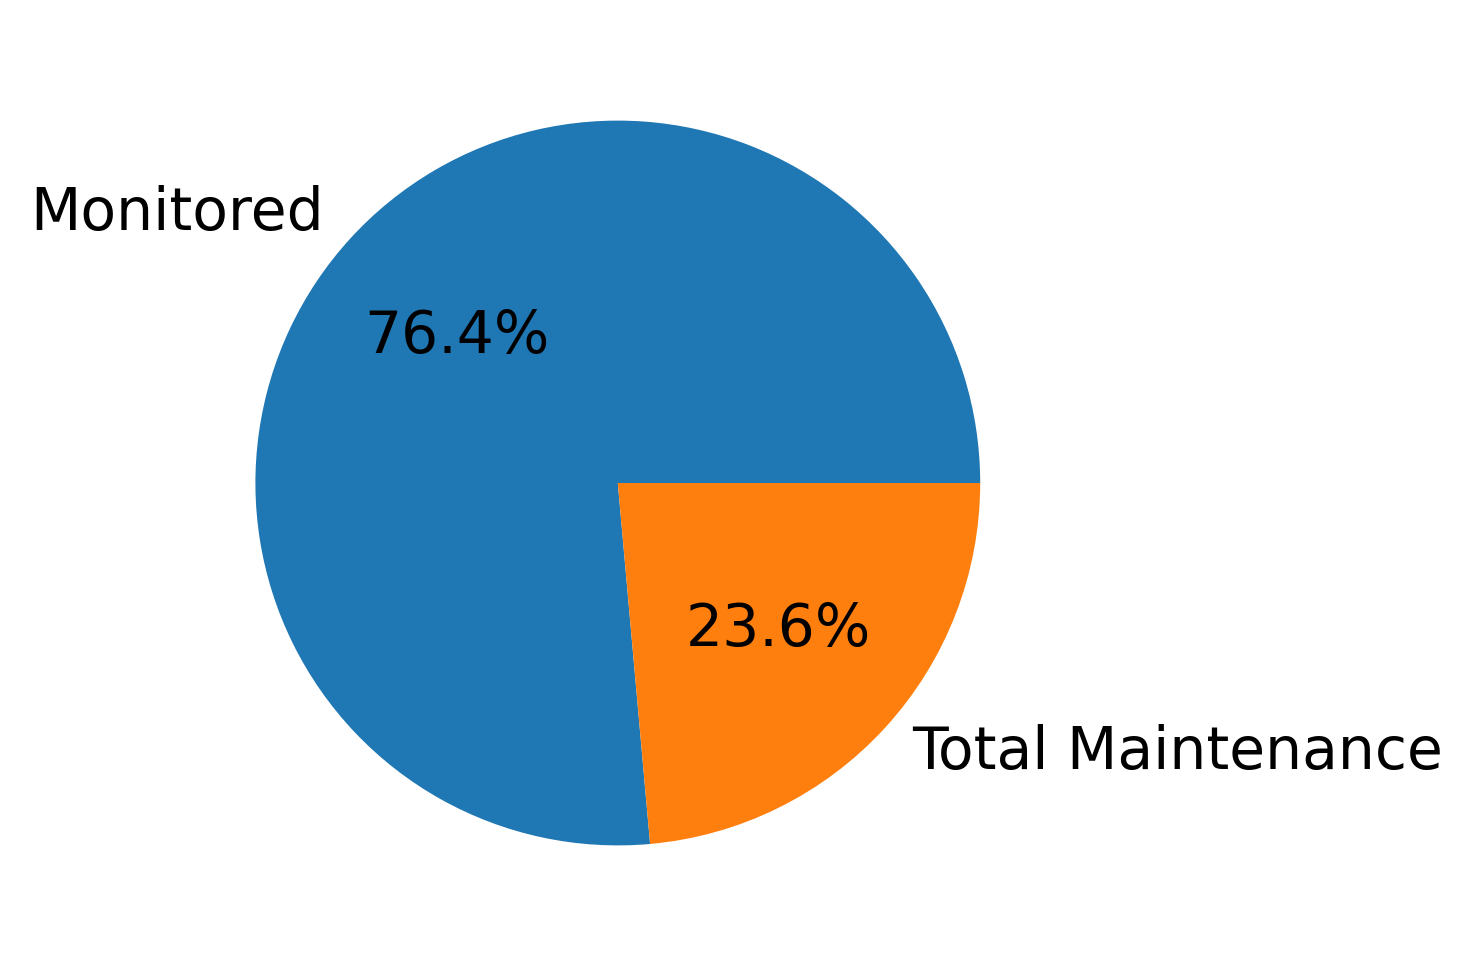

In [59]:
plt.pie(y, labels=x, autopct='%1.1f%%');

Effectively 24% of the plants are under maintanence, only 76% of the plants are running.

##### Let's explore the types of maintenance

In [60]:
x = ['total', 'planned', 'unplanned']
y = [df['total_capacity_under_maintenance_mw'].sum(), df['planned_maintenance_mw'].sum(),
    df['unplanned_maintenance_mw'].sum()]

Text(0, 0.5, 'Power (MW)')

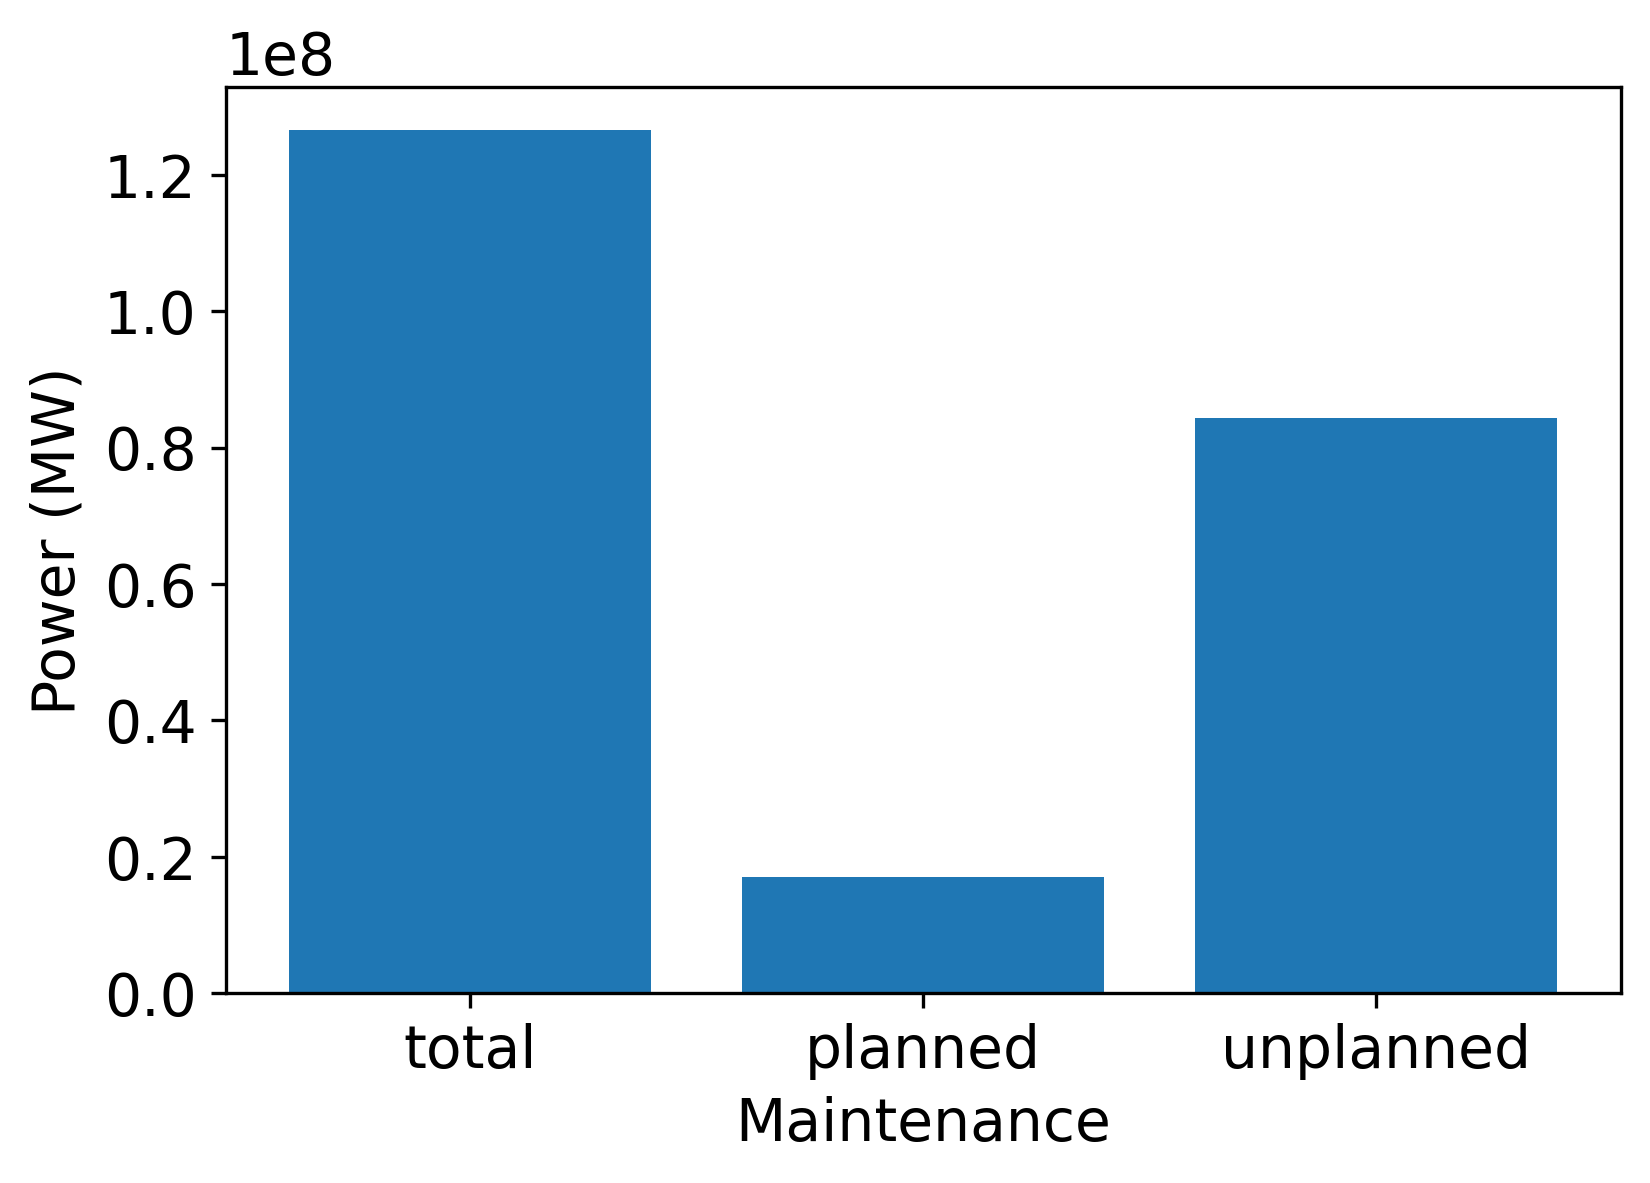

In [61]:
plt.bar(x,y)
plt.xlabel('Maintenance')
plt.ylabel('Power (MW)')

##### What percent of the maintenanace is unplanned?

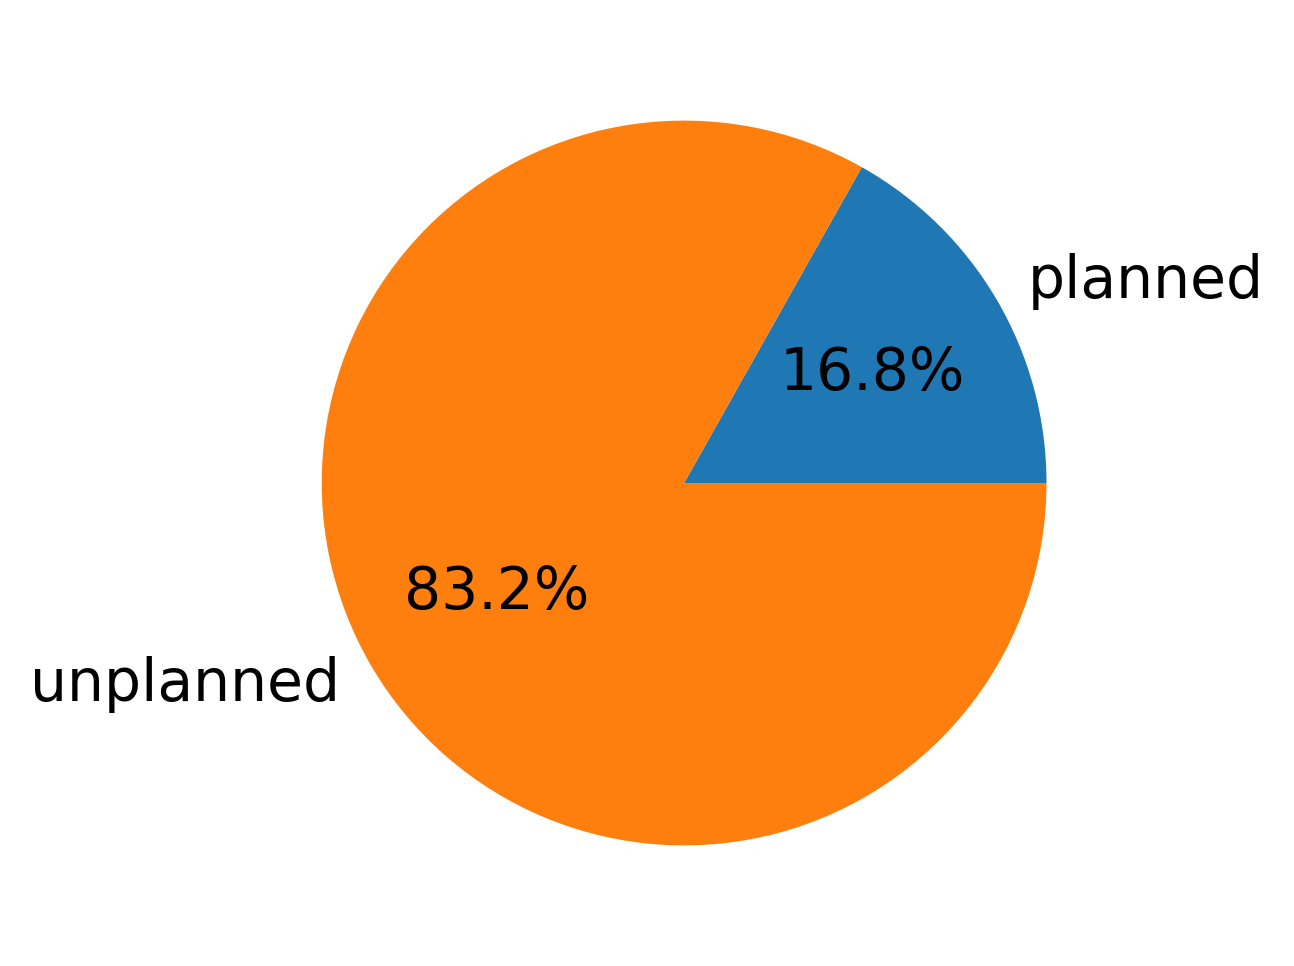

In [62]:
x = ['planned', 'unplanned']
y = [df['planned_maintenance_mw'].sum(), df['unplanned_maintenance_mw'].sum()]

plt.pie(y, labels=x, autopct='%1.1f%%');

- ~83% of the operations are unplanned and only 17% are planned.
- There is a plenty of room here to improve. How can we cut down the unplanned maintenance?

#### Expected and Actual power generation

In [63]:
x = ['Expected', 'Actual']
y = [df['expected_generation_mu'].sum(), df['actual_generation_mu'].sum()]

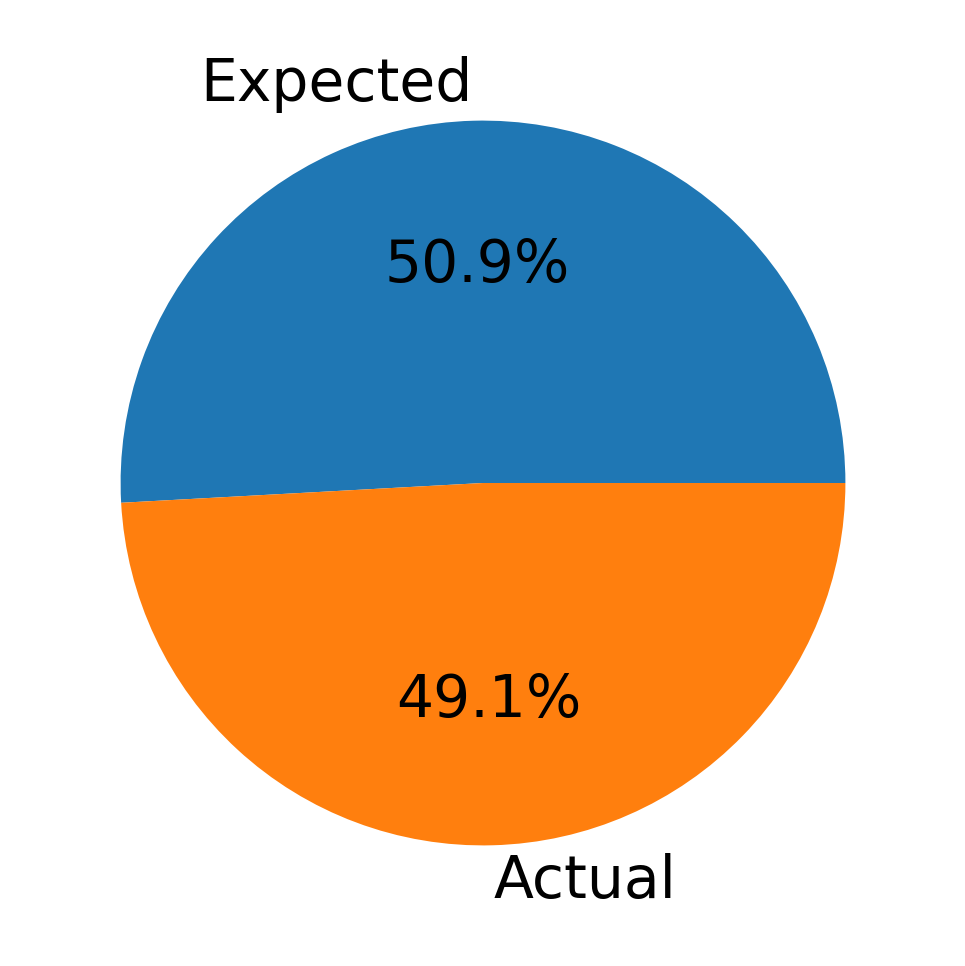

In [64]:
plt.pie(y, labels=x, autopct='%1.1f%%');

When we sum up, actual power generation falls short of only 1%. Some days will have more power and some days less.

Text(0, 0.5, 'Counts')

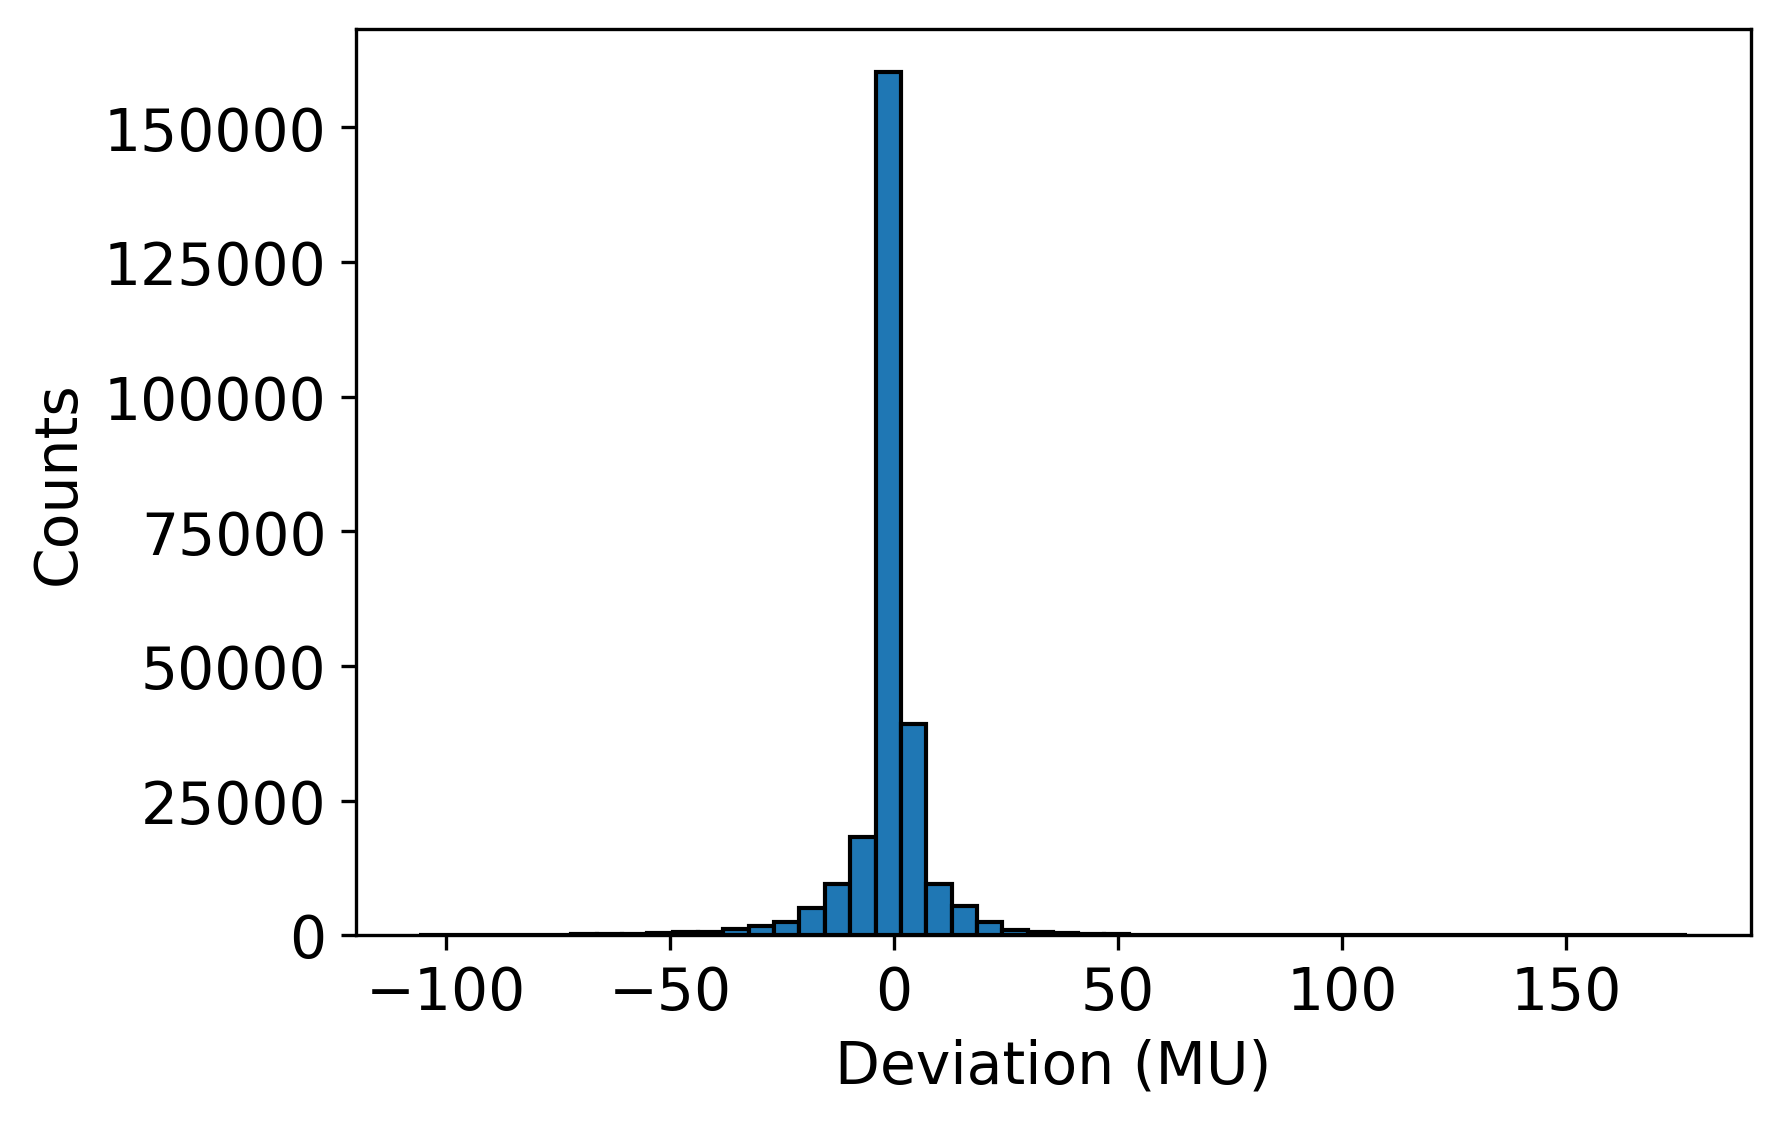

In [65]:
plt.hist(df['deviation_generation_mu'], bins = 50, edgecolor = 'k');
plt.xlabel('Deviation (MU)'); plt.ylabel('Counts')

Most of the days, there is 0 deviation.

## 3.3 Year, month, and daywise analysis

Let's explore over the years, how we are doing.

In [66]:
df

date              power_station  monitored_capacity_mw  \
22986  2018-01-01                  TATA MAH.                 447.00   
23031  2018-01-01                  ST-CMSECP                 250.00   
23072  2018-01-01                  NTPC Ltd.                 500.00   
23073  2018-01-01                       ONGC                 726.60   
23055  2018-01-01                      JITPL                1200.00   
...           ...                        ...                    ...   
280714 2021-12-31  Andaman & Nicobar Islands                  40.05   
280577 2021-12-31                  Rajasthan                8844.80   
280630 2021-12-31                      DBPCL                1200.00   
280717 2021-12-31                     Sikkim                1200.00   
280689 2021-12-31                    GVKP&IL                 220.00   

        total_capacity_under_maintenance_mw  planned_maintenance_mw  \
22986                                   0.0                     0.0   
23031                                 250.0                     0.0   
23072                                   0.0                     0.0   
23073                                   0.0                     0.0   
23055                                 600.0                     0.0   
...                                     ...                     ...   
280714                                  0.0                     0.0   
280577                               2132.0                   250.0   
280630                                  0.0                     0.0   
280717                                  0.0                     0.0   
280689                                220.0                     0.0   

        expected_generation_mu  actual_generation_mu  \
22986                        4                     3   
23031                        4                     0   
23072                        7                     8   
23073                       12                    13   
23055                       18                     0   
...                        ...                   ...   
280714                       0                     0   
280577                     118                   114   
280630                      21                    26   
280717                       7                     7   
280689                       0                     0   

        unplanned_maintenance_mw  deviation_generation_mu  
22986                        0.0                       -1  
23031                      250.0                       -4  
23072                        0.0                        1  
23073                        0.0                        1  
23055                      600.0                      -18  
...                          ...                      ...  
280714                       0.0                        0  
280577                     632.0                       -4  
280630                       0.0                        5  
280717                       0.0                        0  
280689                       0.0                        0  

[259988 rows x 9 columns]

In [71]:
df_yr = df.groupby(df.date.dt.year)[list(df.select_dtypes(include=[np.number]))].sum()

In [73]:
df_yr

monitored_capacity_mw  total_capacity_under_maintenance_mw  \
date                                                               
2018           9.992753e+07                          28598882.53   
2019           1.016979e+08                          31386724.16   
2020           1.037090e+08                          34581814.26   
2021           1.047382e+08                          31961247.78   

      planned_maintenance_mw  expected_generation_mu  actual_generation_mu  \
date                                                                         
2018              4059326.40                 1221378               1218359   
2019              4288690.98                 1291731               1218228   
2020              3654308.13                 1279094               1218465   
2021              5088569.47                 1319270               1281677   

      unplanned_maintenance_mw  deviation_generation_mu  
date                                                     
2018               20045477.64                    -3019  
2019               20610017.29                   -73503  
2020               23973465.39                   -60629  
2021               19744567.99                   -37593

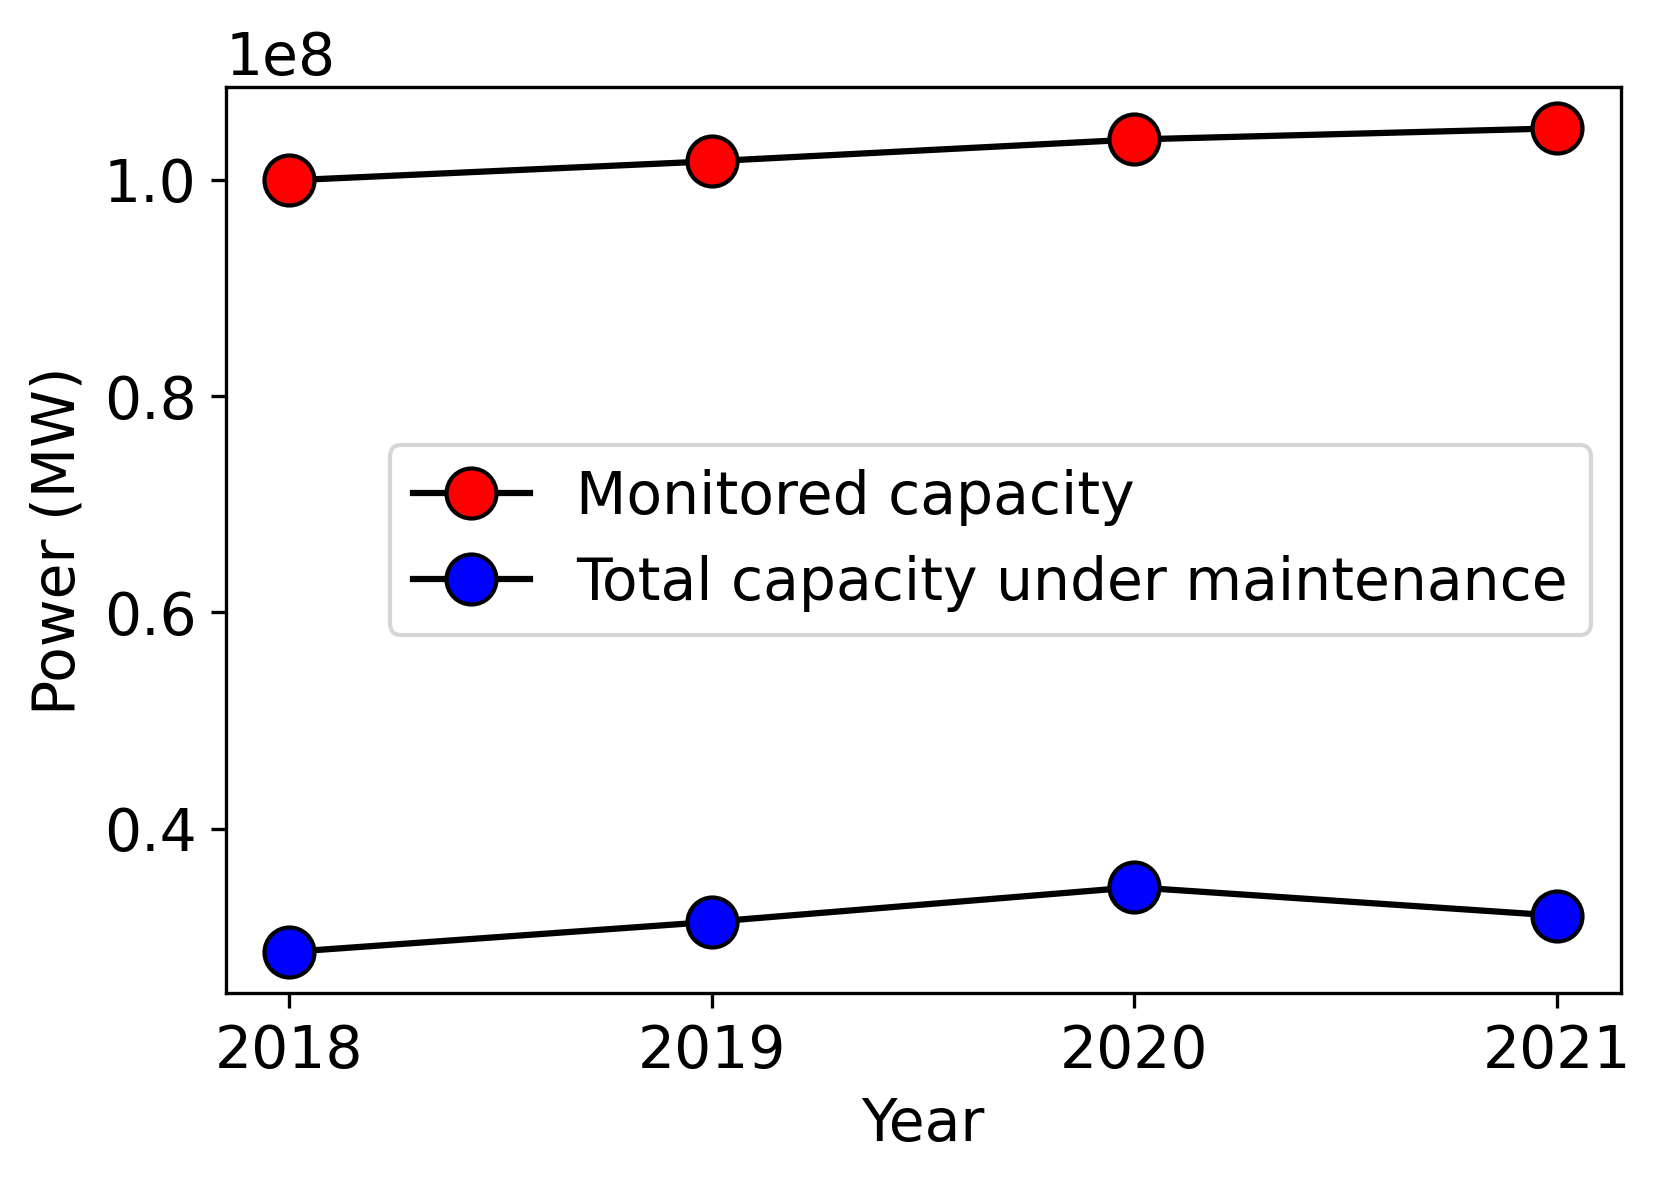

In [77]:
# Again index becomes the x-axis
plt.plot(df_yr['monitored_capacity_mw'],'-ok', markersize=12,
         markerfacecolor='r', markeredgecolor='k', label='Monitored capacity')
plt.plot(df_yr['total_capacity_under_maintenance_mw'], '-ok', markersize=12,
         markerfacecolor='b', markeredgecolor='k', label='Total capacity under maintenance')
plt.legend()
plt.xlabel('Year'); plt.ylabel('Power (MW)', )
plt.xticks(np.arange(2018,2022,1));

Text(0, 0.5, 'Power (MW)')

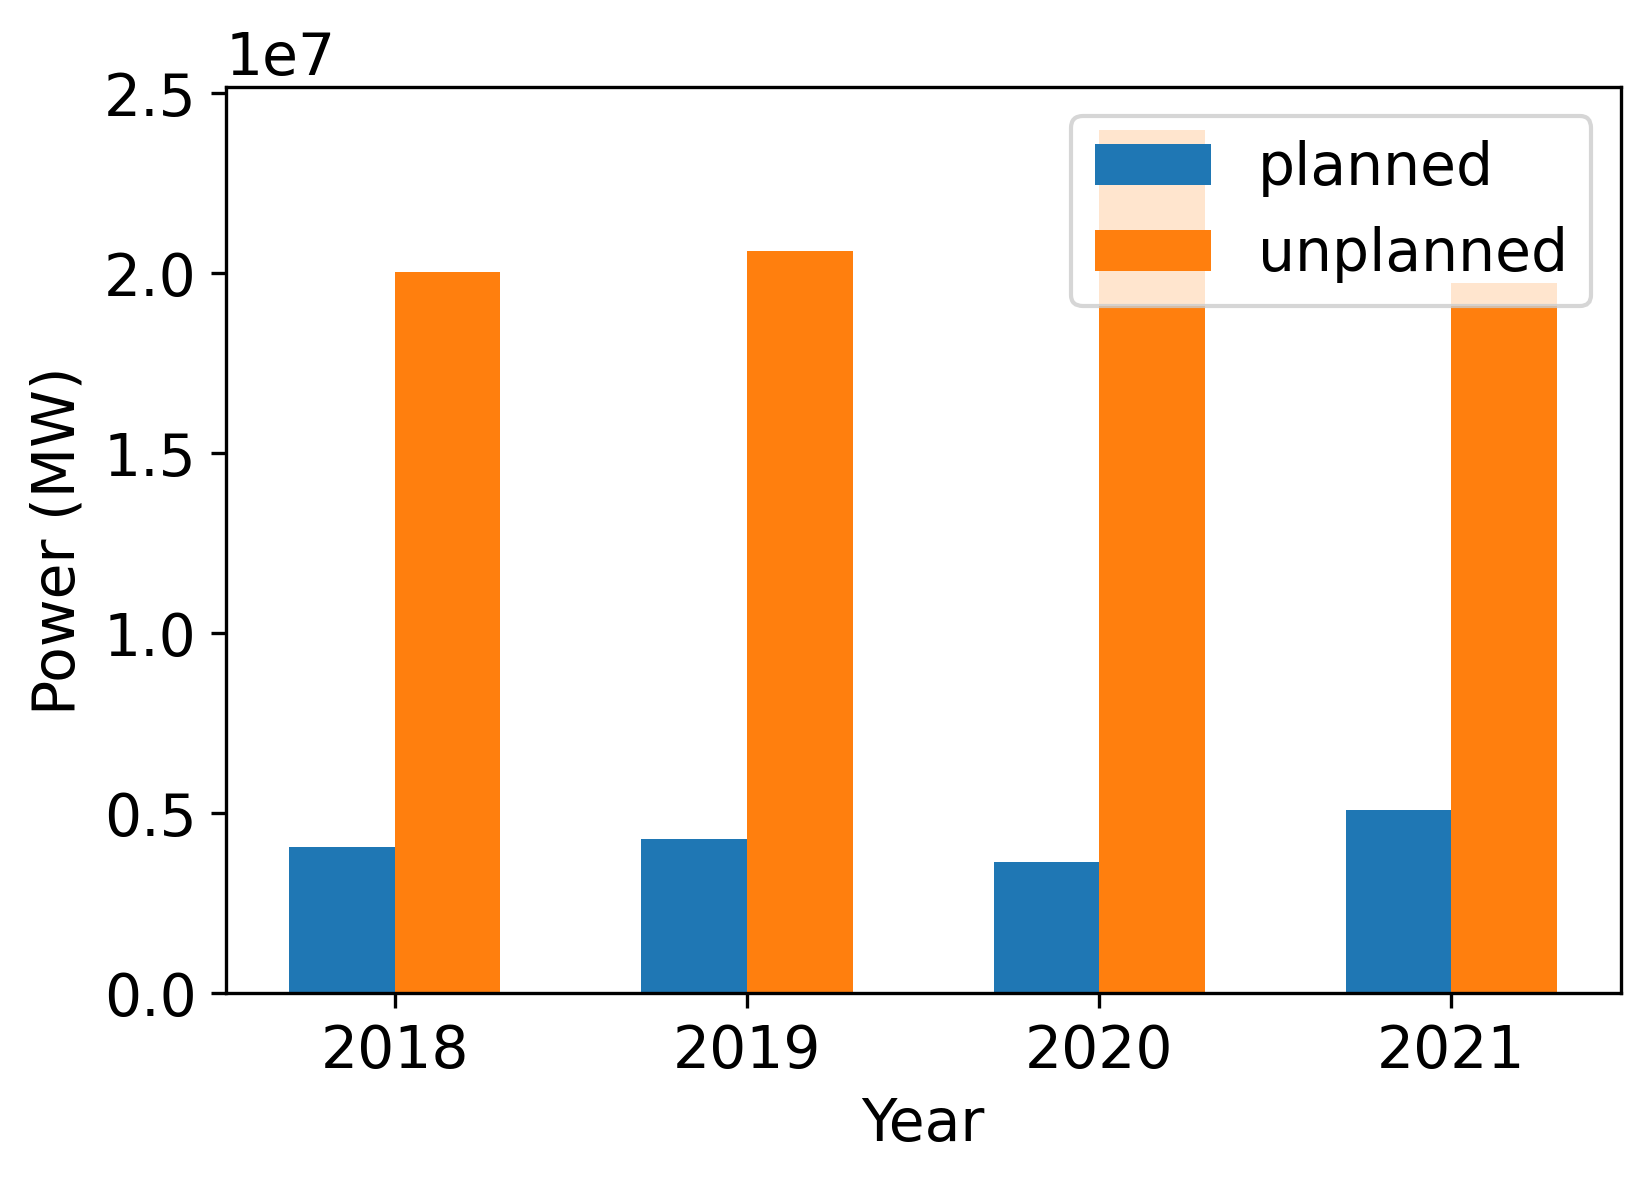

In [85]:
y1 = list(df_yr['planned_maintenance_mw'])
y2 = list(df_yr['unplanned_maintenance_mw'])
x=['2018', '2019', '2020', '2021']
plt.bar(x, y1,  align='edge', width=-0.3, label='planned')
plt.bar(x, y2,  align='edge', width=0.3, label='unplanned')
plt.legend()

plt.xlabel('Year')
plt.ylabel('Power (MW)')

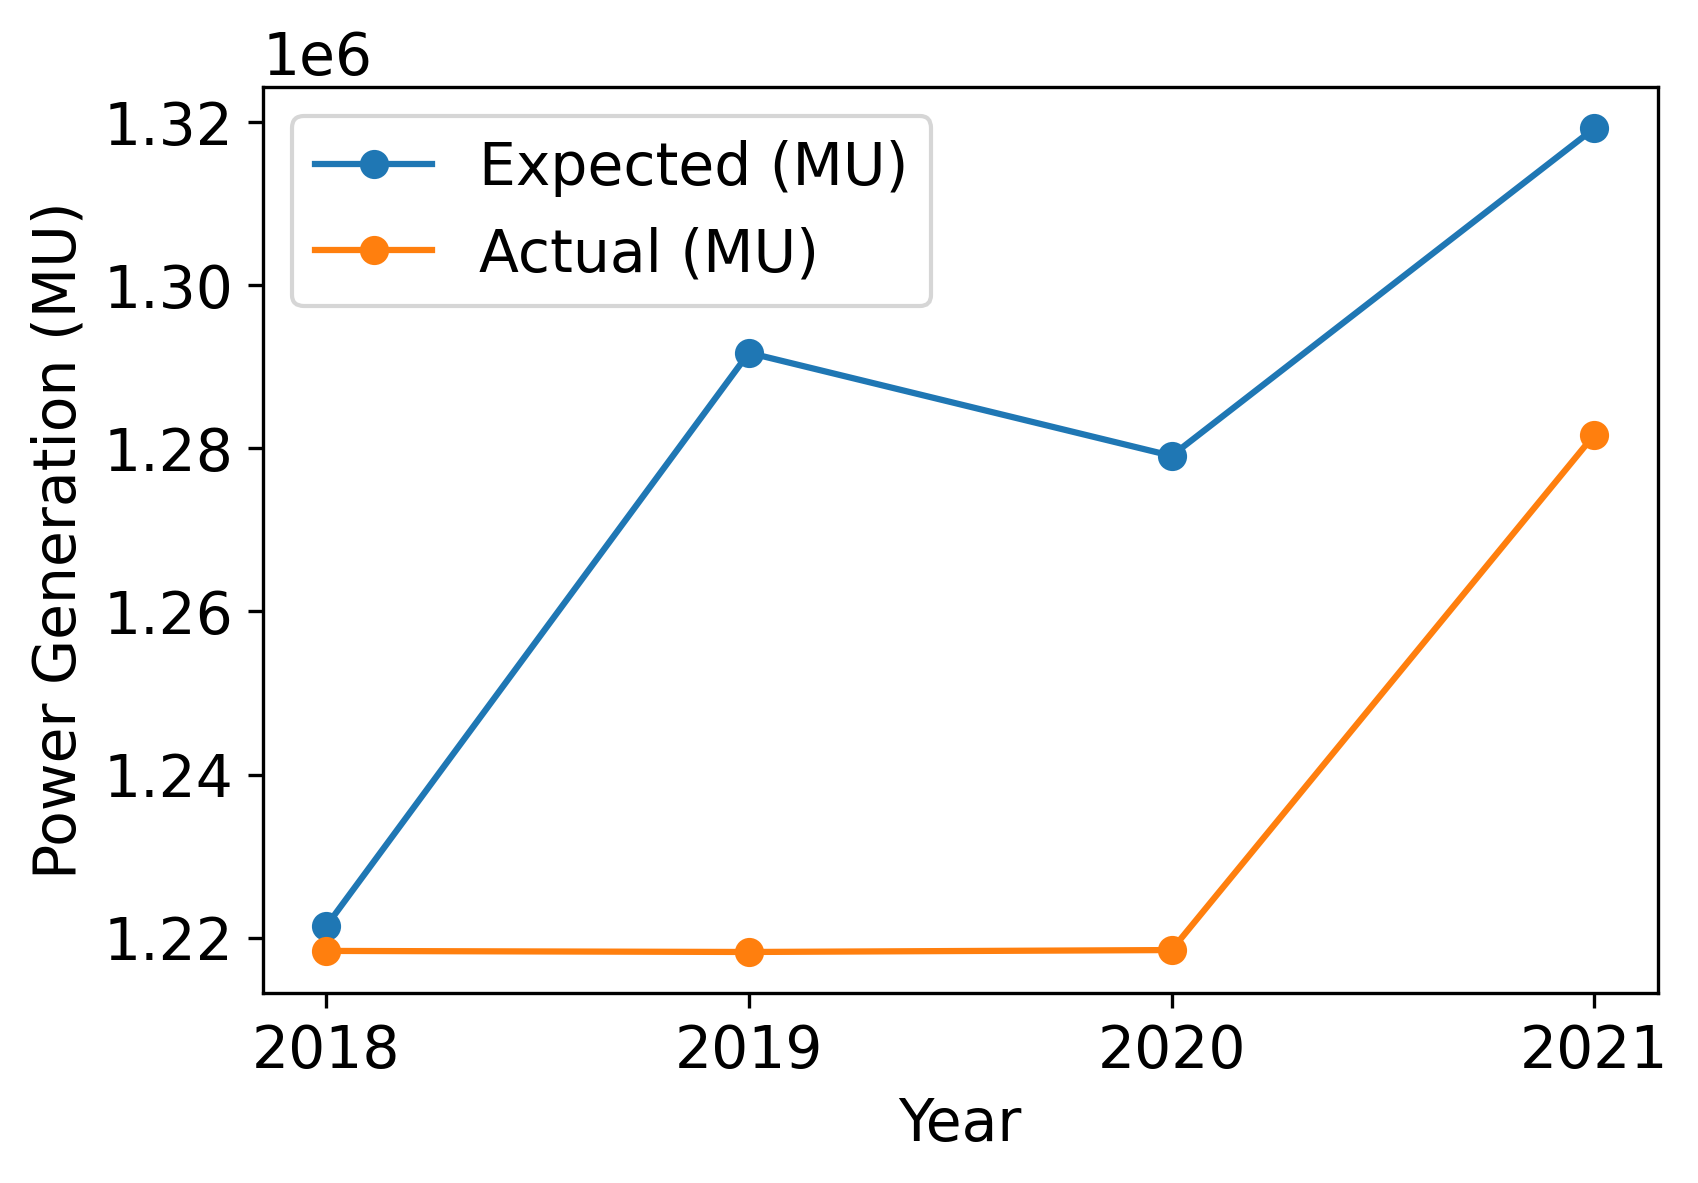

In [86]:
plt.plot(df_yr['expected_generation_mu'], '-o', label='Expected (MU)')
plt.plot(df_yr['actual_generation_mu'], '-o', label='Actual (MU)')
plt.legend()
plt.xlabel('Year'); plt.ylabel('Power Generation (MU)');
plt.xticks(np.arange(2018, 2022, 1)); # (start, stop, step)

The power production is nearly constant, increased in 2021.

good news: monitored capacity is increasing and in 2021 maintenance is coming down.

Is there any trend month wise or day wise?

In [89]:
df_month = df.groupby(df.date.dt.month)[list(df.select_dtypes(include=[np.number]))].sum()
df_day = df.groupby(df.date.dt.day)[list(df.select_dtypes(include=[np.number]))].sum()

In [92]:
df_month

monitored_capacity_mw  total_capacity_under_maintenance_mw  \
date                                                               
1               34048486.64                          10000034.69   
2               31571476.74                           9501498.46   
3               51109563.13                          15573286.67   
4               27762569.98                           8030421.32   
5               28875406.23                           8752535.96   
6               33128727.47                          10334274.08   
7               34290182.52                          10976085.81   
8               34290203.65                          11102831.53   
9               33146416.08                          10339729.77   
10              34306173.03                          10688792.38   
11              33201504.09                          10650251.87   
12              34341865.06                          10578926.19   

      planned_maintenance_mw  expected_generation_mu  actual_generation_mu  \
date                                                                         
1                 1410124.46                  415387                403659   
2                 1409635.73                  392281                379526   
3                 1997737.51                  635875                624126   
4                 1050126.46                  345761                344628   
5                 1046824.34                  367391                353730   
6                 1217835.93                  421507                404685   
7                 1553153.07                  425329                409830   
8                 1726402.45                  433346                415699   
9                 1350889.74                  424670                406588   
10                1238284.97                  429030                409066   
11                1456603.27                  402758                381190   
12                1633277.05                  418138                404002   

      unplanned_maintenance_mw  deviation_generation_mu  
date                                                     
1                   6656037.82                   -11728  
2                   6201482.67                   -12755  
3                  10490564.46                   -11749  
4                   5332925.20                    -1133  
5                   5818378.99                   -13661  
6                   7060246.51                   -16822  
7                   7279137.57                   -15499  
8                   7291307.13                   -17647  
9                   6970941.02                   -18082  
10                  7363199.89                   -19964  
11                  7127632.09                   -21568  
12                  6781674.96                   -14136

In [93]:
df_day

monitored_capacity_mw  total_capacity_under_maintenance_mw  \
date                                                               
1               13359294.84                           3975143.48   
2               13363904.52                           3859088.88   
3               13379281.90                           3960059.81   
4               10066226.00                           2720123.92   
5               10089054.00                           2879444.40   
6               13488845.16                           4307249.41   
7               13490211.16                           4211810.42   
8               13516271.18                           4512788.35   
9               13502803.86                           4354361.01   
10              13507484.12                           4204134.66   
11              13523311.24                           4469980.99   
12              13532922.84                           4485612.51   
13              12903247.23                           3970658.34   
14              12903187.23                           3973460.82   
15              12902977.23                           3995177.54   
16              12902977.23                           3983486.66   
17              12904657.23                           3982817.27   
18              33862955.70                          10634394.30   
19              12622386.79                           3879242.25   
20              12622929.92                           3872477.57   
21              12624779.93                           3870610.82   
22              12625387.04                           3859077.11   
23              12626647.01                           3872488.22   
24              12626617.01                           3843687.22   
25              12626617.01                           3833502.45   
26              12627427.01                           3835557.77   
27              12629247.01                           3856806.13   
28              12629817.00                           3879946.19   
29              11797415.99                           3652582.05   
30              11516098.72                           3564778.48   
31               7297591.51                           2228119.70   

      planned_maintenance_mw  expected_generation_mu  actual_generation_mu  \
date                                                                         
1                  581793.19                  161115                155488   
2                  579143.28                  165391                158983   
3                  605282.22                  165877                163023   
4                  369249.94                  126112                128286   
5                  319844.64                  130410                126063   
6                  376273.44                  176605                161762   
7                  555555.87                  166025                167278   
8                  737051.10                  170150                162278   
9                  640910.24                  172968                167885   
10                 499709.11                  168764                167254   
11                 492981.44                  162698                151547   
12                 719557.24                  159257                152214   
13                 532995.05                  160653                154715   
14                 530449.87                  160727                153961   
15                 535786.90                  160399                153745   
16                 541093.94                  160648                154354   
17                 540438.28                  160671                155019   
18                1286015.94                  422608                408824   
19                 534117.28                  157339                152138   
20                 535638.48                  157171                152405   
21                 540861.78                 

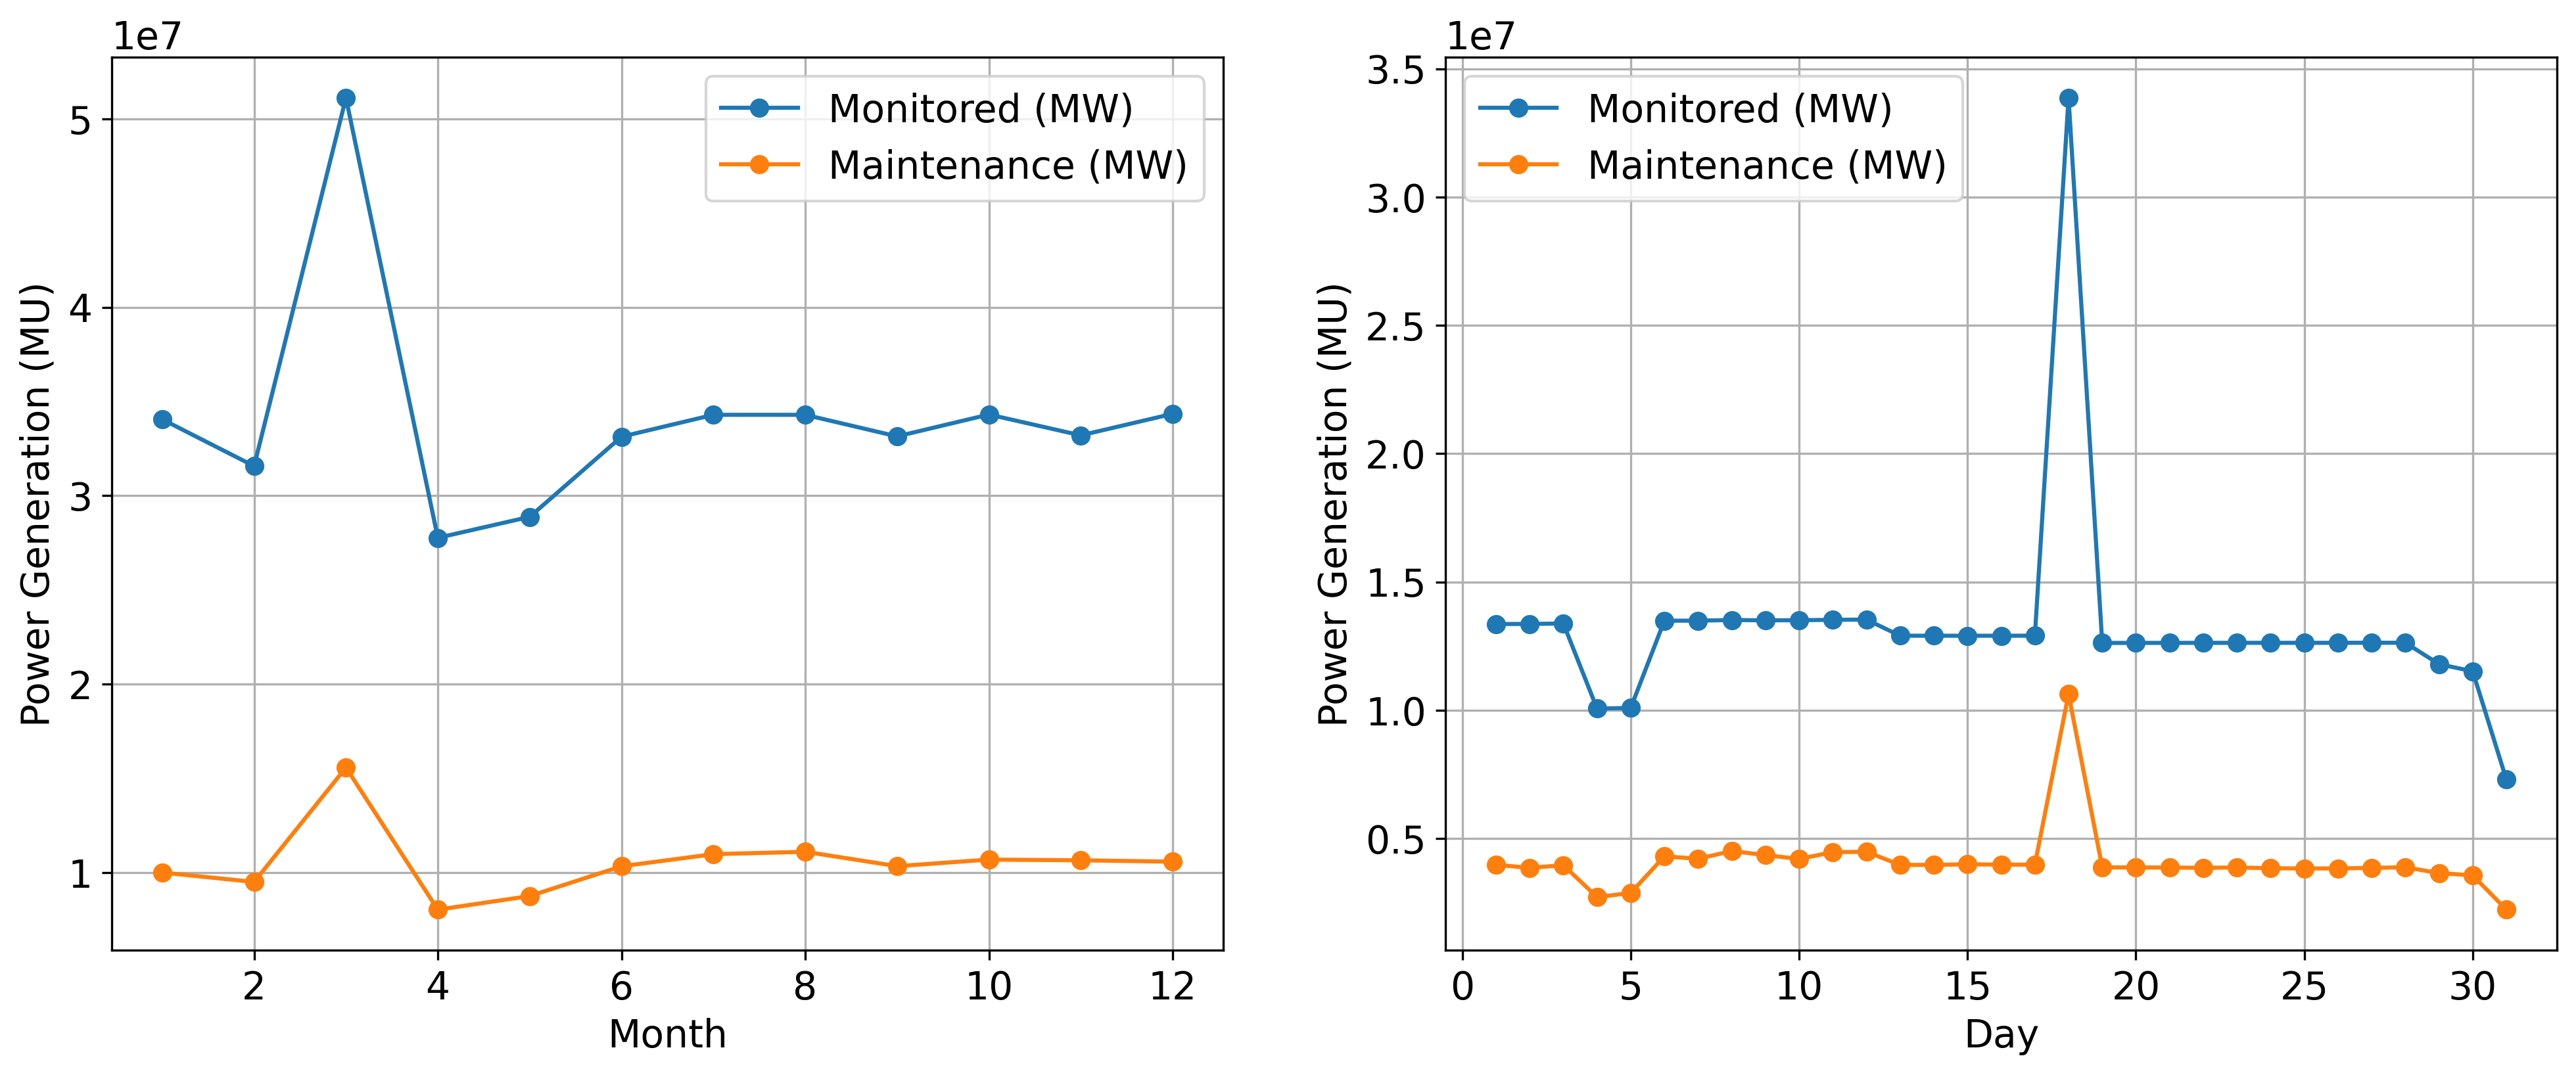

In [94]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) # 1 row and 2 columns, filling the 1st one

plt.plot(df_month['monitored_capacity_mw'], '-o', label='Monitored (MW)')
plt.plot(df_month['total_capacity_under_maintenance_mw'], '-o', label='Maintenance (MW)')
plt.legend()
plt.xlabel('Month'); plt.ylabel('Power Generation (MU)');
plt.grid()
# plt.xticks(np.arange(2018, 2022, 1)); # (start, stop, step)


plt.subplot(1,2,2) # 1 row and 2 columns, filling the 2nd one
plt.plot(df_day['monitored_capacity_mw'], '-o', label='Monitored (MW)')
plt.plot(df_day['total_capacity_under_maintenance_mw'], '-o', label='Maintenance (MW)')
plt.legend()
plt.xlabel('Day'); plt.ylabel('Power Generation (MU)');
plt.grid()

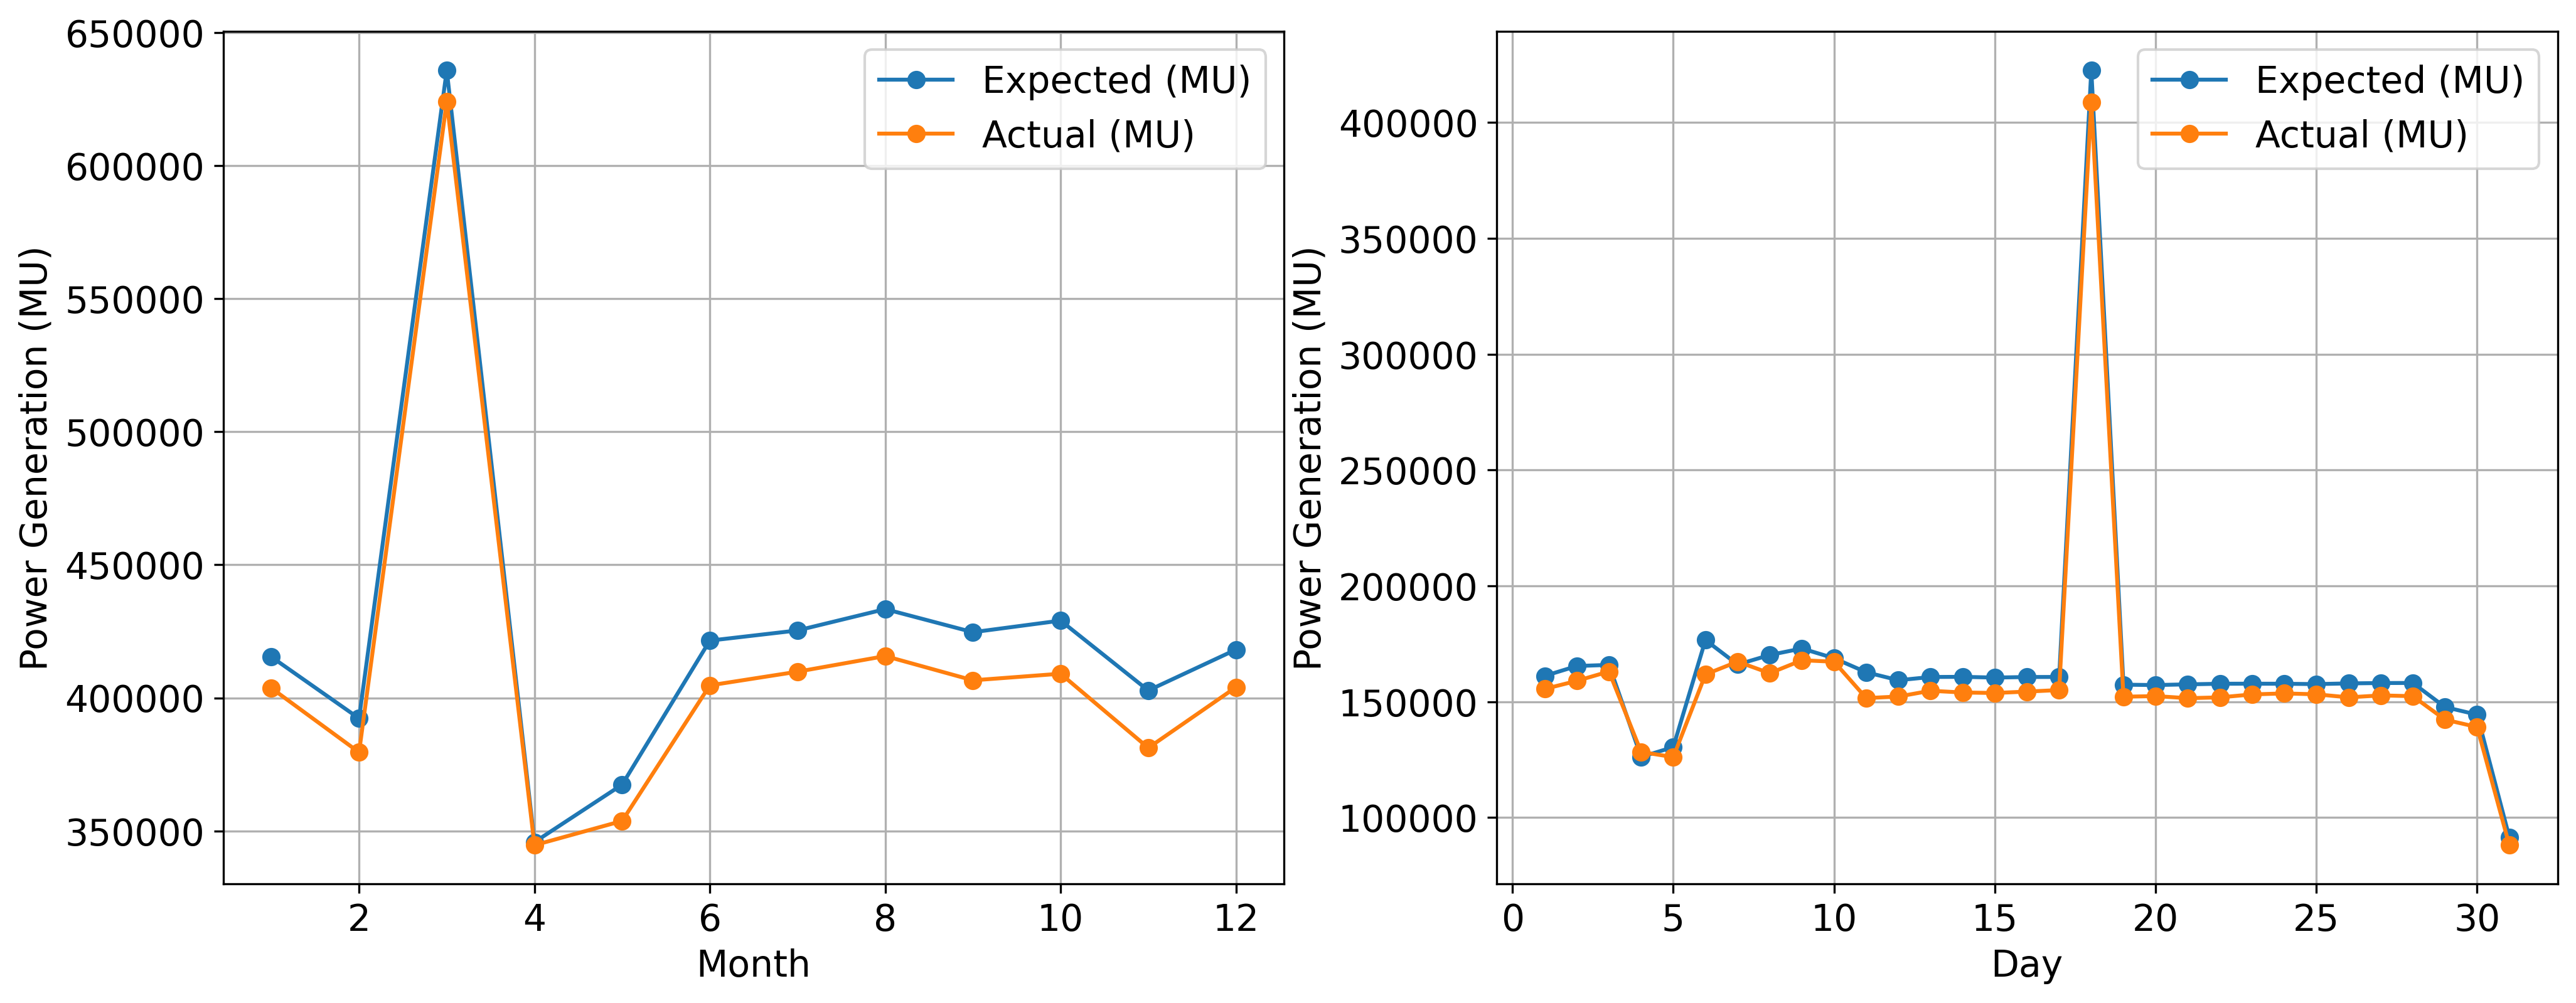

In [95]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) # 1 row and 2 columns, filling the 1st one

plt.plot(df_month['expected_generation_mu'], '-o', label='Expected (MU)')
plt.plot(df_month['actual_generation_mu'], '-o', label='Actual (MU)')
plt.legend()
plt.xlabel('Month'); plt.ylabel('Power Generation (MU)');
plt.grid()
# plt.xticks(np.arange(2018, 2022, 1)); # (start, stop, step)


plt.subplot(1,2,2) # 1 row and 2 columns, filling the 2nd one
plt.plot(df_day['expected_generation_mu'], '-o', label='Expected (MU)')
plt.plot(df_day['actual_generation_mu'], '-o', label='Actual (MU)')
plt.legend()
plt.xlabel('Day'); plt.ylabel('Power Generation (MU)');
plt.grid()

- In March, the production is higher (something wrong.....).
- 18th of every month, the production is higher (something wrong....).
- April and May have the lowest production (power cuts!!).
- 31st won't be there in many months, hence the power generation is lower.

# 4. Outlier detection, data cleaning, and analysis

## 4.1 Outlier detection

It's too hard to find the outlier from this big data.

Let's group the total production per day by all the companies to find outlier.

In [96]:
df

date              power_station  monitored_capacity_mw  \
22986  2018-01-01                  TATA MAH.                 447.00   
23031  2018-01-01                  ST-CMSECP                 250.00   
23072  2018-01-01                  NTPC Ltd.                 500.00   
23073  2018-01-01                       ONGC                 726.60   
23055  2018-01-01                      JITPL                1200.00   
...           ...                        ...                    ...   
280714 2021-12-31  Andaman & Nicobar Islands                  40.05   
280577 2021-12-31                  Rajasthan                8844.80   
280630 2021-12-31                      DBPCL                1200.00   
280717 2021-12-31                     Sikkim                1200.00   
280689 2021-12-31                    GVKP&IL                 220.00   

        total_capacity_under_maintenance_mw  planned_maintenance_mw  \
22986                                   0.0                     0.0   
23031                                 250.0                     0.0   
23072                                   0.0                     0.0   
23073                                   0.0                     0.0   
23055                                 600.0                     0.0   
...                                     ...                     ...   
280714                                  0.0                     0.0   
280577                               2132.0                   250.0   
280630                                  0.0                     0.0   
280717                                  0.0                     0.0   
280689                                220.0                     0.0   

        expected_generation_mu  actual_generation_mu  \
22986                        4                     3   
23031                        4                     0   
23072                        7                     8   
23073                       12                    13   
23055                       18                     0   
...                        ...                   ...   
280714                       0                     0   
280577                     118                   114   
280630                      21                    26   
280717                       7                     7   
280689                       0                     0   

        unplanned_maintenance_mw  deviation_generation_mu  
22986                        0.0                       -1  
23031                      250.0                       -4  
23072                        0.0                        1  
23073                        0.0                        1  
23055                      600.0                      -18  
...                          ...                      ...  
280714                       0.0                        0  
280577                     632.0                       -4  
280630                       0.0                        5  
280717                       0.0                        0  
280689                       0.0                        0  

[259988 rows x 9 columns]

In [97]:
len(df['date'].unique())

1385

In [99]:
df_date = df.groupby(df.date.dt.date)[list(df.select_dtypes(include=[np.number]))].sum()

In [71]:
df_date

monitored_capacity_mw  total_capacity_under_maintenance_mw  \
date                                                                     
2018-01-01              270648.43                             73883.61   
2018-01-02              271498.43                             73794.38   
2018-01-03              271245.51                             77858.33   
2018-01-04              274925.51                             69200.40   
2018-01-05              274711.51                             71556.05   
...                           ...                                  ...   
2021-12-27              288468.93                             75614.54   
2021-12-28              288468.93                             77576.54   
2021-12-29              288468.93                             81282.51   
2021-12-30              288468.93                             83190.28   
2021-12-31              288468.93                             80304.31   

            planned_maintenance_mw  expected_generation_mu  \
date                                                         
2018-01-01                 9594.65                    3180   
2018-01-02                10406.57                    3223   
2018-01-03                 9552.87                    3353   
2018-01-04                 8832.90                    3371   
2018-01-05                 9514.40                    3388   
...                            ...                     ...   
2021-12-27                13943.55                    3502   
2021-12-28                14323.55                    3502   
2021-12-29                14258.51                    3502   
2021-12-30                14008.51                    3509   
2021-12-31                13581.05                    3541   

            actual_generation_mu  unplanned_maintenance_mw  \
date                                                         
2018-01-01                  3088                  54042.50   
2018-01-02                  3206                  53170.10   
2018-01-03                  3353                  57569.60   
2018-01-04                  3163                  49143.10   
2018-01-05                  3191                  49921.10   
...                          ...                       ...   
2021-12-27                  3522                  41297.79   
2021-12-28                  3443                  42755.59   
2021-12-29                  3352                  45581.59   
2021-12-30                  3306                  46772.59   
2021-12-31                  3418                  43877.59   

            deviation_generation_mu  
date                                 
2018-01-01                      -92  
2018-01-02                      -17  
2018-01-03                        0  
2018-01-04                     -208  
2018-01-05                     -197  
...                             ...  
2021-12-27                       20  
2021-12-28                      -59  
2021-12-29                     -150  
2021-12-30                     -203  
2021-12-31                     -123  

[1385 rows x 7 columns]

Now we have boiled down from 2,59,988 to 1,385 data points

In [100]:
x=np.arange(0,len(df_date))

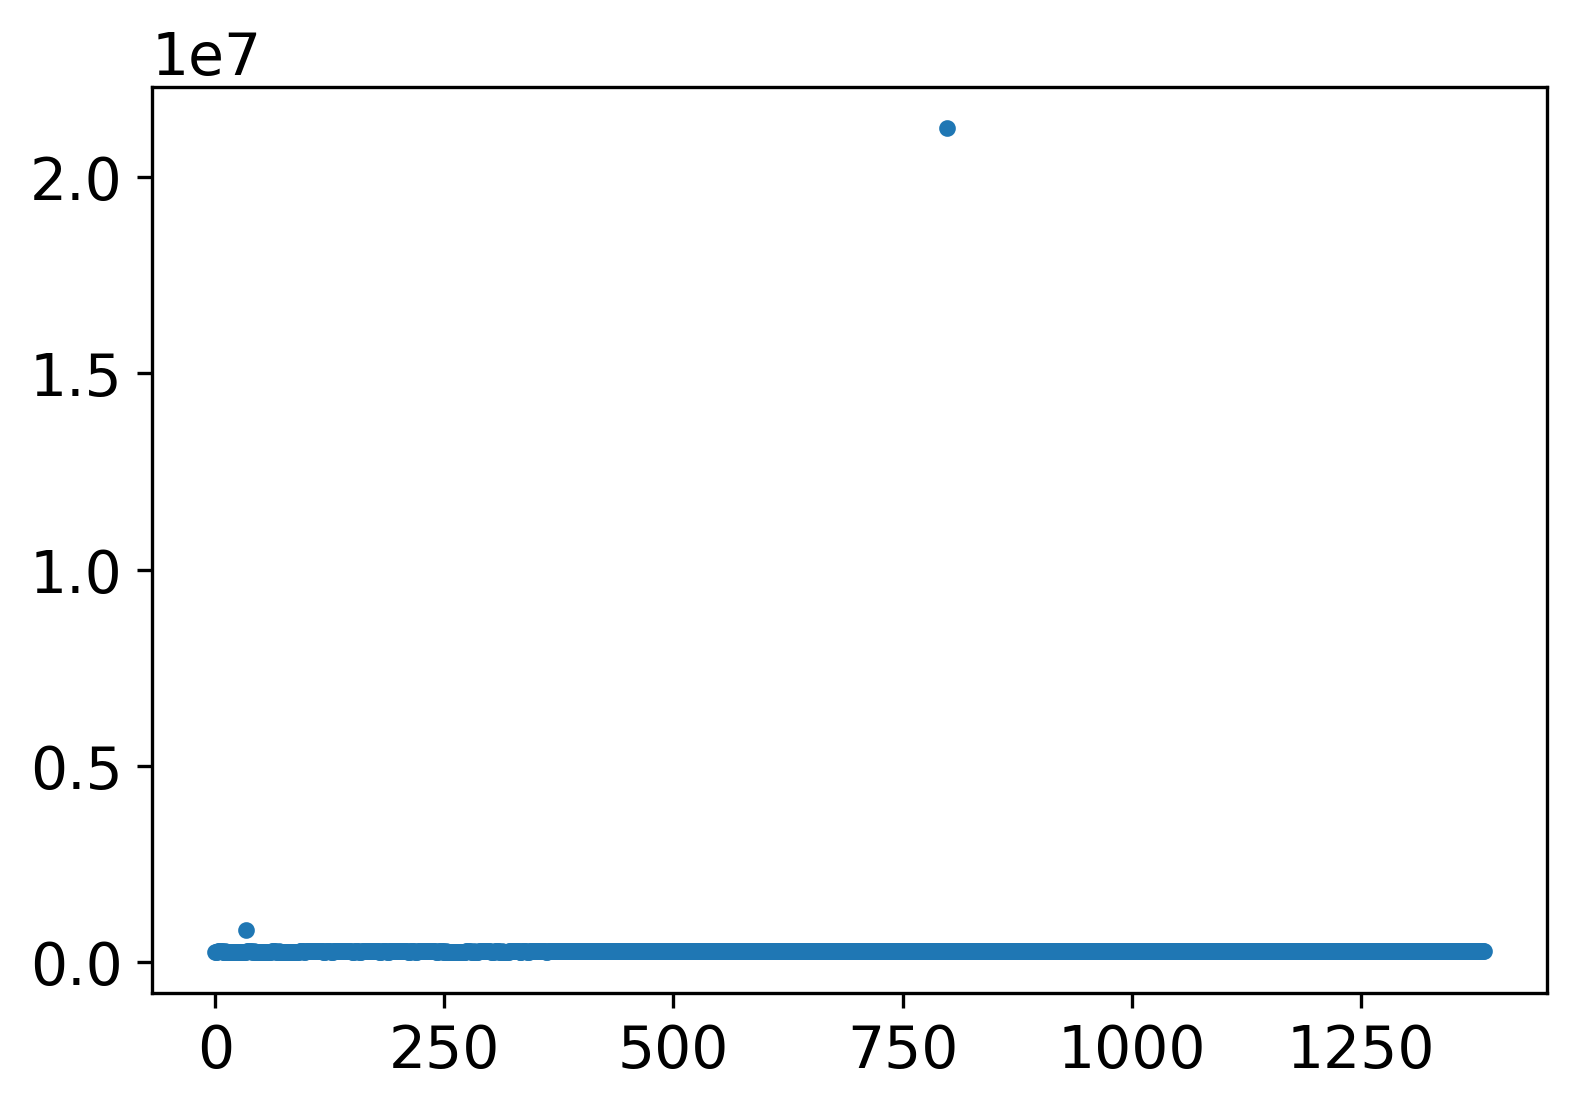

In [102]:
plt.plot(x, df_date['monitored_capacity_mw'].to_numpy(),'.')

Let's plot in the range 750 to 850 to identify the outlier.

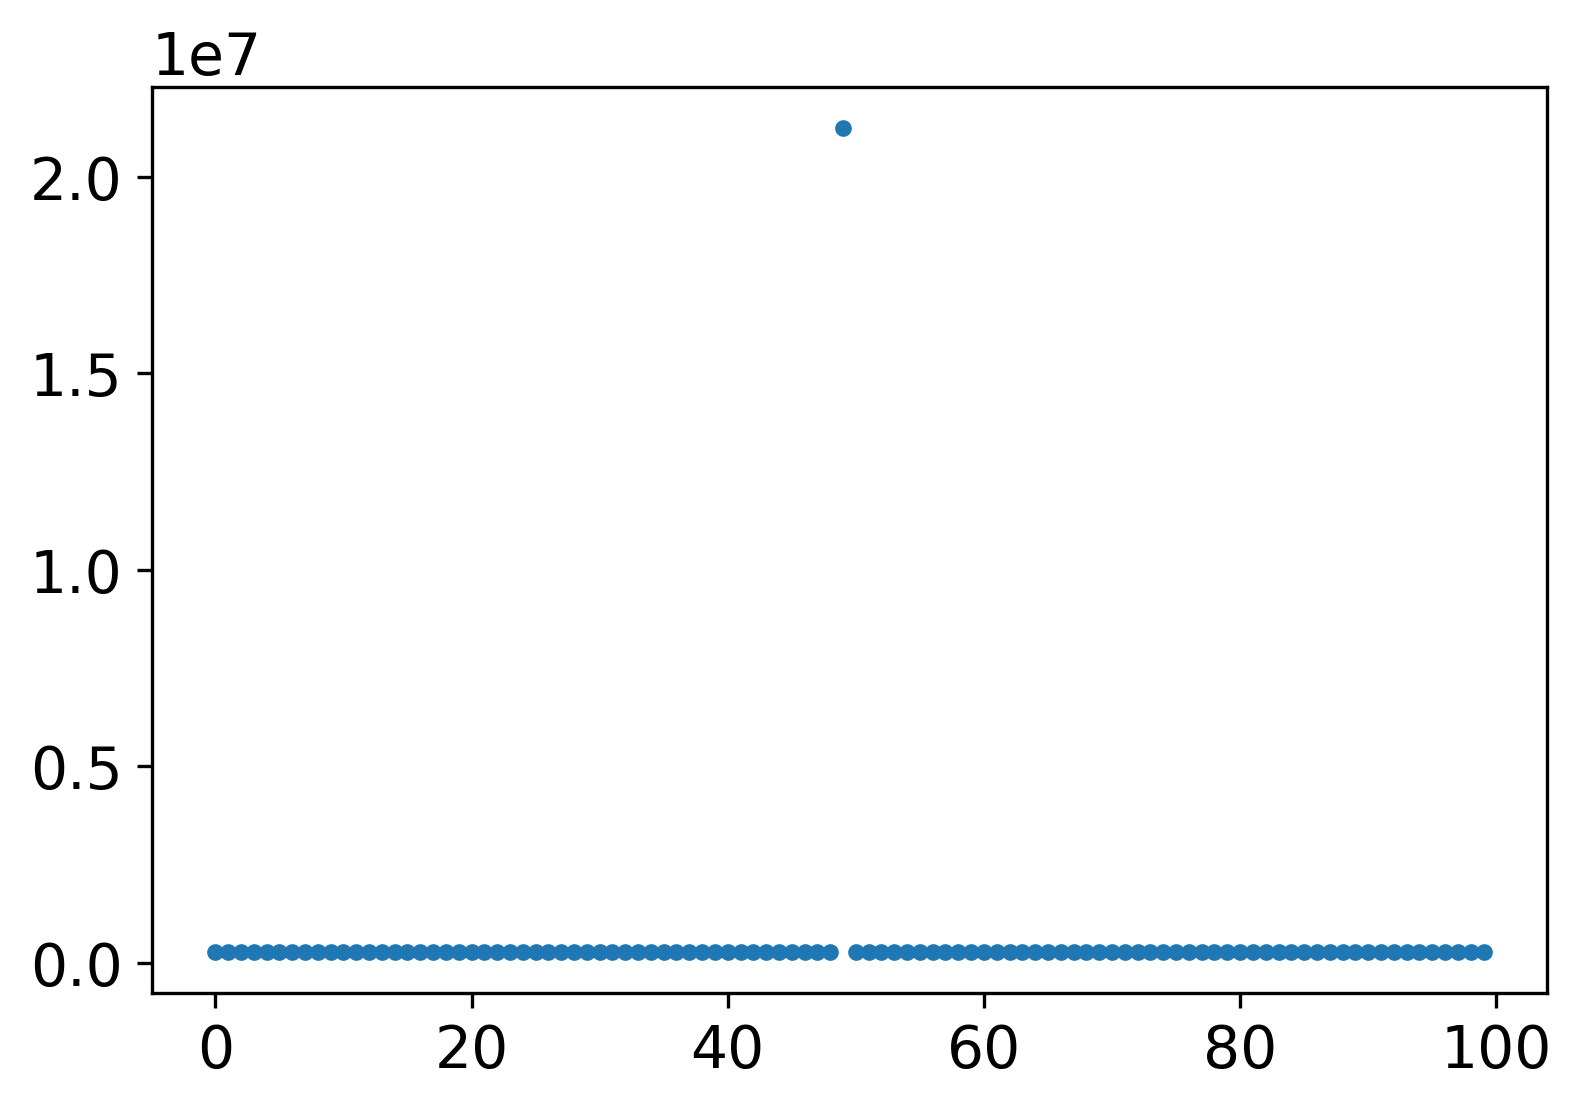

In [104]:
x=np.arange(0,100)
plt.plot(x,df_date['monitored_capacity_mw'][750:850].to_numpy(),'.')

Let's use plotly for interactive plots.

In [106]:
px.scatter(df_date['monitored_capacity_mw'])

We need the exact row number, not by year.

In [107]:
px.scatter(df_date, x = np.arange(0,len(df_date)), y ='monitored_capacity_mw')

In [109]:
df_date['monitored_capacity_mw'][799]

/tmp/ipykernel_37728/3322274614.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



21240171.0

In [110]:
df_date['monitored_capacity_mw'][798:801]

date
2020-03-17      282542.28
2020-03-18    21240171.00
2020-04-01      282814.15
Name: monitored_capacity_mw, dtype: float64

In [111]:
df_date['monitored_capacity_mw'][799]/df_date['monitored_capacity_mw'][800]

/tmp/ipykernel_37728/3608616469.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



75.10292890224905

**Outlier 1:**
- 75 times higher in a single day is impossible, i.e ~2 orders of magnitude higher. Let's ignore this point.<br>
- Need to remove `2020-03-18`

In [112]:
df_date['monitored_capacity_mw'][34]

/tmp/ipykernel_37728/4024933709.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



824776.53

In [113]:
df_date['monitored_capacity_mw'][33:36]

date
2018-02-03    271245.51
2018-02-04    824776.53
2018-02-05    274711.51
Name: monitored_capacity_mw, dtype: float64

In [114]:
df_date['monitored_capacity_mw'][34]/df_date['monitored_capacity_mw'][35]

/tmp/ipykernel_37728/377430508.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



3.0023369970919673

**Outlier 2:**
- All of a sudden, 3 times higher production in a single day. It's not reasonable. Let's ignore this data.
- Need to remove `2018-02-04`

## 4.2 Data cleaning

In [115]:
df_date_clean = df_date.copy()
df_date_clean

monitored_capacity_mw  total_capacity_under_maintenance_mw  \
date                                                                     
2018-01-01              270648.43                             73883.61   
2018-01-02              271498.43                             73794.38   
2018-01-03              271245.51                             77858.33   
2018-01-04              274925.51                             69200.40   
2018-01-05              274711.51                             71556.05   
...                           ...                                  ...   
2021-12-27              288468.93                             75614.54   
2021-12-28              288468.93                             77576.54   
2021-12-29              288468.93                             81282.51   
2021-12-30              288468.93                             83190.28   
2021-12-31              288468.93                             80304.31   

            planned_maintenance_mw  expected_generation_mu  \
date                                                         
2018-01-01                 9594.65                    3180   
2018-01-02                10406.57                    3223   
2018-01-03                 9552.87                    3353   
2018-01-04                 8832.90                    3371   
2018-01-05                 9514.40                    3388   
...                            ...                     ...   
2021-12-27                13943.55                    3502   
2021-12-28                14323.55                    3502   
2021-12-29                14258.51                    3502   
2021-12-30                14008.51                    3509   
2021-12-31                13581.05                    3541   

            actual_generation_mu  unplanned_maintenance_mw  \
date                                                         
2018-01-01                  3088                  54042.50   
2018-01-02                  3206                  53170.10   
2018-01-03                  3353                  57569.60   
2018-01-04                  3163                  49143.10   
2018-01-05                  3191                  49921.10   
...                          ...                       ...   
2021-12-27                  3522                  41297.79   
2021-12-28                  3443                  42755.59   
2021-12-29                  3352                  45581.59   
2021-12-30                  3306                  46772.59   
2021-12-31                  3418                  43877.59   

            deviation_generation_mu  
date                                 
2018-01-01                      -92  
2018-01-02                      -17  
2018-01-03                        0  
2018-01-04                     -208  
2018-01-05                     -197  
...                             ...  
2021-12-27                       20  
2021-12-28                      -59  
2021-12-29                     -150  
2021-12-30                     -203  
2021-12-31                     -123  

[1385 rows x 7 columns]

In [116]:
# run this cell only once, or the new 34th and 799th index will be removed once again
# If you do it twice by mistake, run the above cell again
df_date_clean = df_date_clean.drop(df_date_clean.index[[34,799]], axis=0) #axis 0 corresponds to a row.

In [117]:
df_date_clean

monitored_capacity_mw  total_capacity_under_maintenance_mw  \
date                                                                     
2018-01-01              270648.43                             73883.61   
2018-01-02              271498.43                             73794.38   
2018-01-03              271245.51                             77858.33   
2018-01-04              274925.51                             69200.40   
2018-01-05              274711.51                             71556.05   
...                           ...                                  ...   
2021-12-27              288468.93                             75614.54   
2021-12-28              288468.93                             77576.54   
2021-12-29              288468.93                             81282.51   
2021-12-30              288468.93                             83190.28   
2021-12-31              288468.93                             80304.31   

            planned_maintenance_mw  expected_generation_mu  \
date                                                         
2018-01-01                 9594.65                    3180   
2018-01-02                10406.57                    3223   
2018-01-03                 9552.87                    3353   
2018-01-04                 8832.90                    3371   
2018-01-05                 9514.40                    3388   
...                            ...                     ...   
2021-12-27                13943.55                    3502   
2021-12-28                14323.55                    3502   
2021-12-29                14258.51                    3502   
2021-12-30                14008.51                    3509   
2021-12-31                13581.05                    3541   

            actual_generation_mu  unplanned_maintenance_mw  \
date                                                         
2018-01-01                  3088                  54042.50   
2018-01-02                  3206                  53170.10   
2018-01-03                  3353                  57569.60   
2018-01-04                  3163                  49143.10   
2018-01-05                  3191                  49921.10   
...                          ...                       ...   
2021-12-27                  3522                  41297.79   
2021-12-28                  3443                  42755.59   
2021-12-29                  3352                  45581.59   
2021-12-30                  3306                  46772.59   
2021-12-31                  3418                  43877.59   

            deviation_generation_mu  
date                                 
2018-01-01                      -92  
2018-01-02                      -17  
2018-01-03                        0  
2018-01-04                     -208  
2018-01-05                     -197  
...                             ...  
2021-12-27                       20  
2021-12-28                      -59  
2021-12-29                     -150  
2021-12-30                     -203  
2021-12-31                     -123  

[1383 rows x 7 columns]

## 4.3 Data analysis

After removing the data, let's plot the same data again and see if there is an improvement.

In [118]:
px.line(df_date_clean,  y ='monitored_capacity_mw')

The monitored capacity is increasing, good.<br>
Maintenance is almost constant and even decreasing tend, good again.

In [119]:
px.area(df_date_clean,  y =[ 'planned_maintenance_mw', 'unplanned_maintenance_mw','total_capacity_under_maintenance_mw'],)

Let's change ylabel from `value` to `Power (MW)` by adding `labels={'value':'Power (MW)'}`

In [120]:
px.area(df_date_clean,  y =[ 'planned_maintenance_mw', 'unplanned_maintenance_mw','total_capacity_under_maintenance_mw'],
       labels={'value':'Power (MW)'})

In [121]:
px.line(df_date_clean, y =['actual_generation_mu', 'expected_generation_mu','deviation_generation_mu'],
       labels={'value':'Power (MU)'})

In [122]:
px.density_heatmap(df_date_clean, y =['actual_generation_mu'])

In [123]:
px.density_heatmap(df_date_clean, y =['expected_generation_mu'])

Actual power generation has more variation than expected power generation

In [124]:
px.box(df_date_clean, y =['expected_generation_mu', 'actual_generation_mu'], points="all",
      labels={'value':'Power (MU)', 'variable':''})

In [125]:
px.violin(df_date_clean, y =['expected_generation_mu', 'actual_generation_mu'], box=True,
         labels={'value':'Power generation (MU)', 'variable':''})

# 5. Exporting the cleaned data

In [126]:
df_date_clean

monitored_capacity_mw  total_capacity_under_maintenance_mw  \
date                                                                     
2018-01-01              270648.43                             73883.61   
2018-01-02              271498.43                             73794.38   
2018-01-03              271245.51                             77858.33   
2018-01-04              274925.51                             69200.40   
2018-01-05              274711.51                             71556.05   
...                           ...                                  ...   
2021-12-27              288468.93                             75614.54   
2021-12-28              288468.93                             77576.54   
2021-12-29              288468.93                             81282.51   
2021-12-30              288468.93                             83190.28   
2021-12-31              288468.93                             80304.31   

            planned_maintenance_mw  expected_generation_mu  \
date                                                         
2018-01-01                 9594.65                    3180   
2018-01-02                10406.57                    3223   
2018-01-03                 9552.87                    3353   
2018-01-04                 8832.90                    3371   
2018-01-05                 9514.40                    3388   
...                            ...                     ...   
2021-12-27                13943.55                    3502   
2021-12-28                14323.55                    3502   
2021-12-29                14258.51                    3502   
2021-12-30                14008.51                    3509   
2021-12-31                13581.05                    3541   

            actual_generation_mu  unplanned_maintenance_mw  \
date                                                         
2018-01-01                  3088                  54042.50   
2018-01-02                  3206                  53170.10   
2018-01-03                  3353                  57569.60   
2018-01-04                  3163                  49143.10   
2018-01-05                  3191                  49921.10   
...                          ...                       ...   
2021-12-27                  3522                  41297.79   
2021-12-28                  3443                  42755.59   
2021-12-29                  3352                  45581.59   
2021-12-30                  3306                  46772.59   
2021-12-31                  3418                  43877.59   

            deviation_generation_mu  
date                                 
2018-01-01                      -92  
2018-01-02                      -17  
2018-01-03                        0  
2018-01-04                     -208  
2018-01-05                     -197  
...                             ...  
2021-12-27                       20  
2021-12-28                      -59  
2021-12-29                     -150  
2021-12-30                     -203  
2021-12-31                     -123  

[1383 rows x 7 columns]

saving the cleaned data to a new csv file named `data_cleaned.csv`

In [128]:
df_date_clean.to_csv('data_cleaned.csv')